# Exploračná analýza dat

# Popis Notebooku
* Nasledujúci notebook vznikol ako domáci projekt pre zimný predmet **Vizualizace dát (2023)** na ČVUT.     
* Obsahuje exploračnú analýzu datasetov
    * [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm), ktorý obsahuje informácie o  zvieratách prijatých do útulku od 1. 10. 2013 do 27.4 2022
    *  [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238), ktorý obsahuje údaje o zvieratách, které útulok opustili.

* Notebook je zložený z 3 častí
    1. Príprava dát
    2. Deskriptívne štatistiky príznakov
        * univariačná a multivariačná analýza jednotlivých príznakov
    3. Vizualizácia odpovedí na rôzne otázky pomocou dát.

# 1. Príprava dát
Načítanie potrebných knižníc.

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import missingno as msno
from datetime import date
sns.set_theme(style='whitegrid', palette="pastel")   

Načítanie potrebných datasetov.

In [2]:
intakes = pd.read_csv('intakes.csv')
outcomes = pd.read_csv('outcomes.csv')

## Datasety
Prípravu dát začneme získaním základných informácii o datasete. Zaujímať nás bude jeho veľkosť, počet záznamov (existencia duplicít) a počet príznakov. 

Pre každý príznak budeme zisťovať jeho dátový typ a počet chýbajúcich údajov.

In [3]:
print(f'Dataset intakes obsahuje {intakes.shape[0]} záznamov a {intakes.shape[1]} príznakov')
print(f'Dataset outcomes obsahuje {outcomes.shape[0]} záznamov a {outcomes.shape[1]} príznakov')

Dataset intakes obsahuje 138585 záznamov a 12 príznakov
Dataset outcomes obsahuje 138769 záznamov a 12 príznakov


In [4]:
print('Duplikáty')
print(f'intakes: {intakes[intakes.duplicated()].shape}')
print(f'outcomes: {outcomes[outcomes.duplicated()].shape}')

Duplikáty
intakes: (20, 12)
outcomes: (17, 12)


Oba datasety obsahujú duplicitné záznamy, ktoré odstránime. 

In [5]:
intakes = intakes.drop_duplicates()
outcomes = outcomes.drop_duplicates()

Zistíme dátové typy jednotlivých príznakov a počet chýbajúcich hodnôt. 

Vytvoríme si funkciu, ktorá vypíše všetky príznaky v datasete, ktorým chýba aspoň jedna hodnota. Chýbajúce hodnoty v celom datasete vizualizujeme.

In [6]:
def missing_vals(dataset :pd.DataFrame) -> None:
    """Print the features containing any missing values."""
    data = dataset.isna().any()

    # Get all columns containing missing values
    features = []
    for index, val in enumerate(data):
        if val:
            features.append(data.index[index])
    print(features)

In [7]:
print('Intakes')
intakes.info()

Intakes
<class 'pandas.core.frame.DataFrame'>
Index: 138565 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138565 non-null  object
 1   Name              97300 non-null   object
 2   DateTime          138565 non-null  object
 3   MonthYear         138565 non-null  object
 4   Found Location    138565 non-null  object
 5   Intake Type       138565 non-null  object
 6   Intake Condition  138565 non-null  object
 7   Animal Type       138565 non-null  object
 8   Sex upon Intake   138564 non-null  object
 9   Age upon Intake   138565 non-null  object
 10  Breed             138565 non-null  object
 11  Color             138565 non-null  object
dtypes: object(12)
memory usage: 13.7+ MB


In [8]:
print('Chýbajúce hodnoty:')
missing_vals(intakes)

Chýbajúce hodnoty:
['Name', 'Sex upon Intake']


Text(0.5, 0, 'Column')

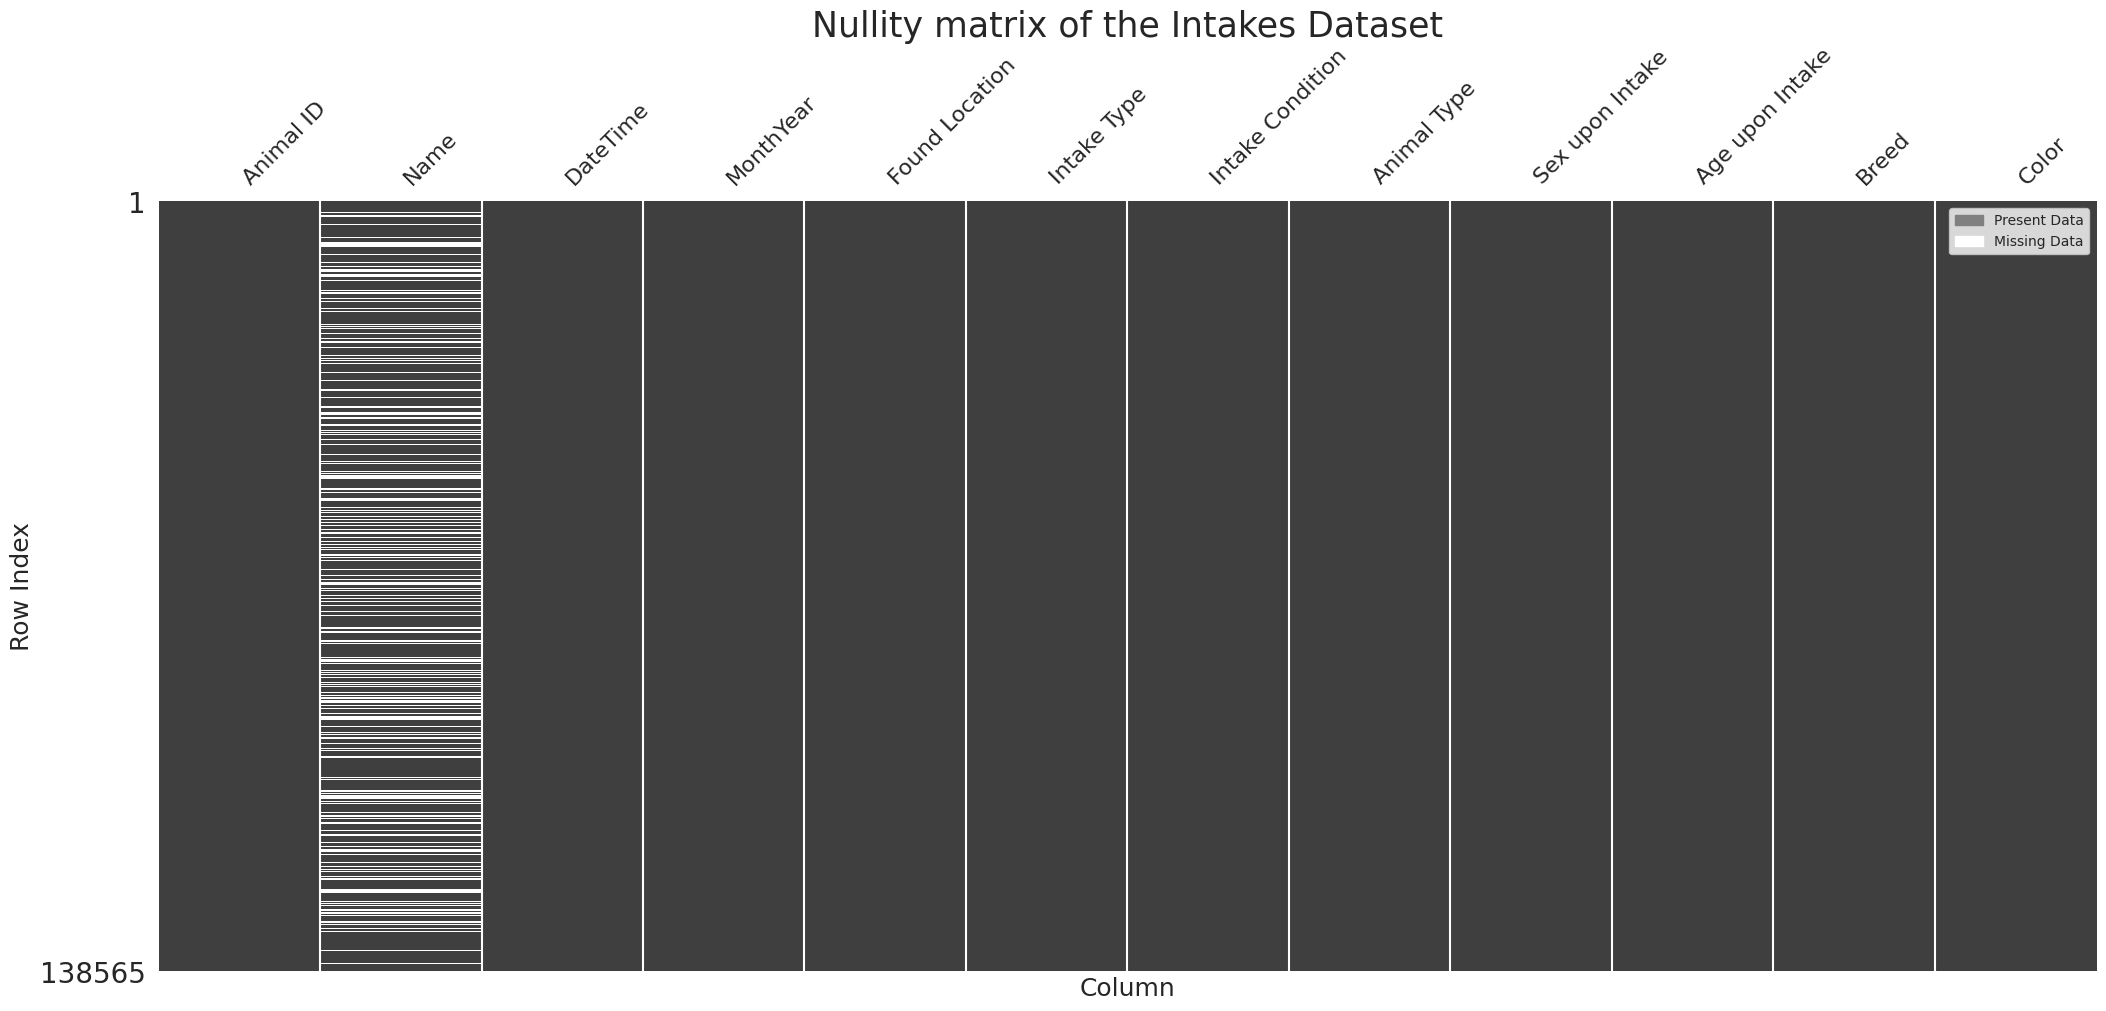

In [9]:
#https://stackoverflow.com/questions/63869715/how-to-show-legend-in-missingno-matrix
ax = msno.matrix(intakes, labels=True, sparkline=False)
ax.set_title('Nullity matrix of the Intakes Dataset',{'fontsize':25,})
ax.legend(handles=[mpatches.Patch(color='gray', label='Present Data'), 
                    mpatches.Patch(color='white', label='Missing Data')], 
                    bbox_to_anchor=(1,1), fontsize=10)
ax.set_ylabel('Row Index',{'fontsize':18})
ax.set_xlabel('Column',{'fontsize':18})

Z predchádzajúcich buniek sme zistili, že dataset obsahuje 12 príznakov. Z grafu je možné vyčítať, že počet chýbajúcich dát je nízky v `Sex upon Intake` a naopak vysoký v `Name`. Ostatné príznaky neobsahujú chýbajúce hodnoty. 

Rovnako budeme postupovať aj v datasete outcomes.

In [10]:
print('Outcomes')
outcomes.info()

Outcomes
<class 'pandas.core.frame.DataFrame'>
Index: 138752 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138752 non-null  object
 1   Name              97502 non-null   object
 2   DateTime          138752 non-null  object
 3   MonthYear         138752 non-null  object
 4   Date of Birth     138752 non-null  object
 5   Outcome Type      138729 non-null  object
 6   Outcome Subtype   63427 non-null   object
 7   Animal Type       138752 non-null  object
 8   Sex upon Outcome  138751 non-null  object
 9   Age upon Outcome  138747 non-null  object
 10  Breed             138752 non-null  object
 11  Color             138752 non-null  object
dtypes: object(12)
memory usage: 13.8+ MB


In [11]:
print('Chýbajúce hodnoty:')
missing_vals(outcomes)

Chýbajúce hodnoty:
['Name', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome']


Text(0.5, 0, 'Column')

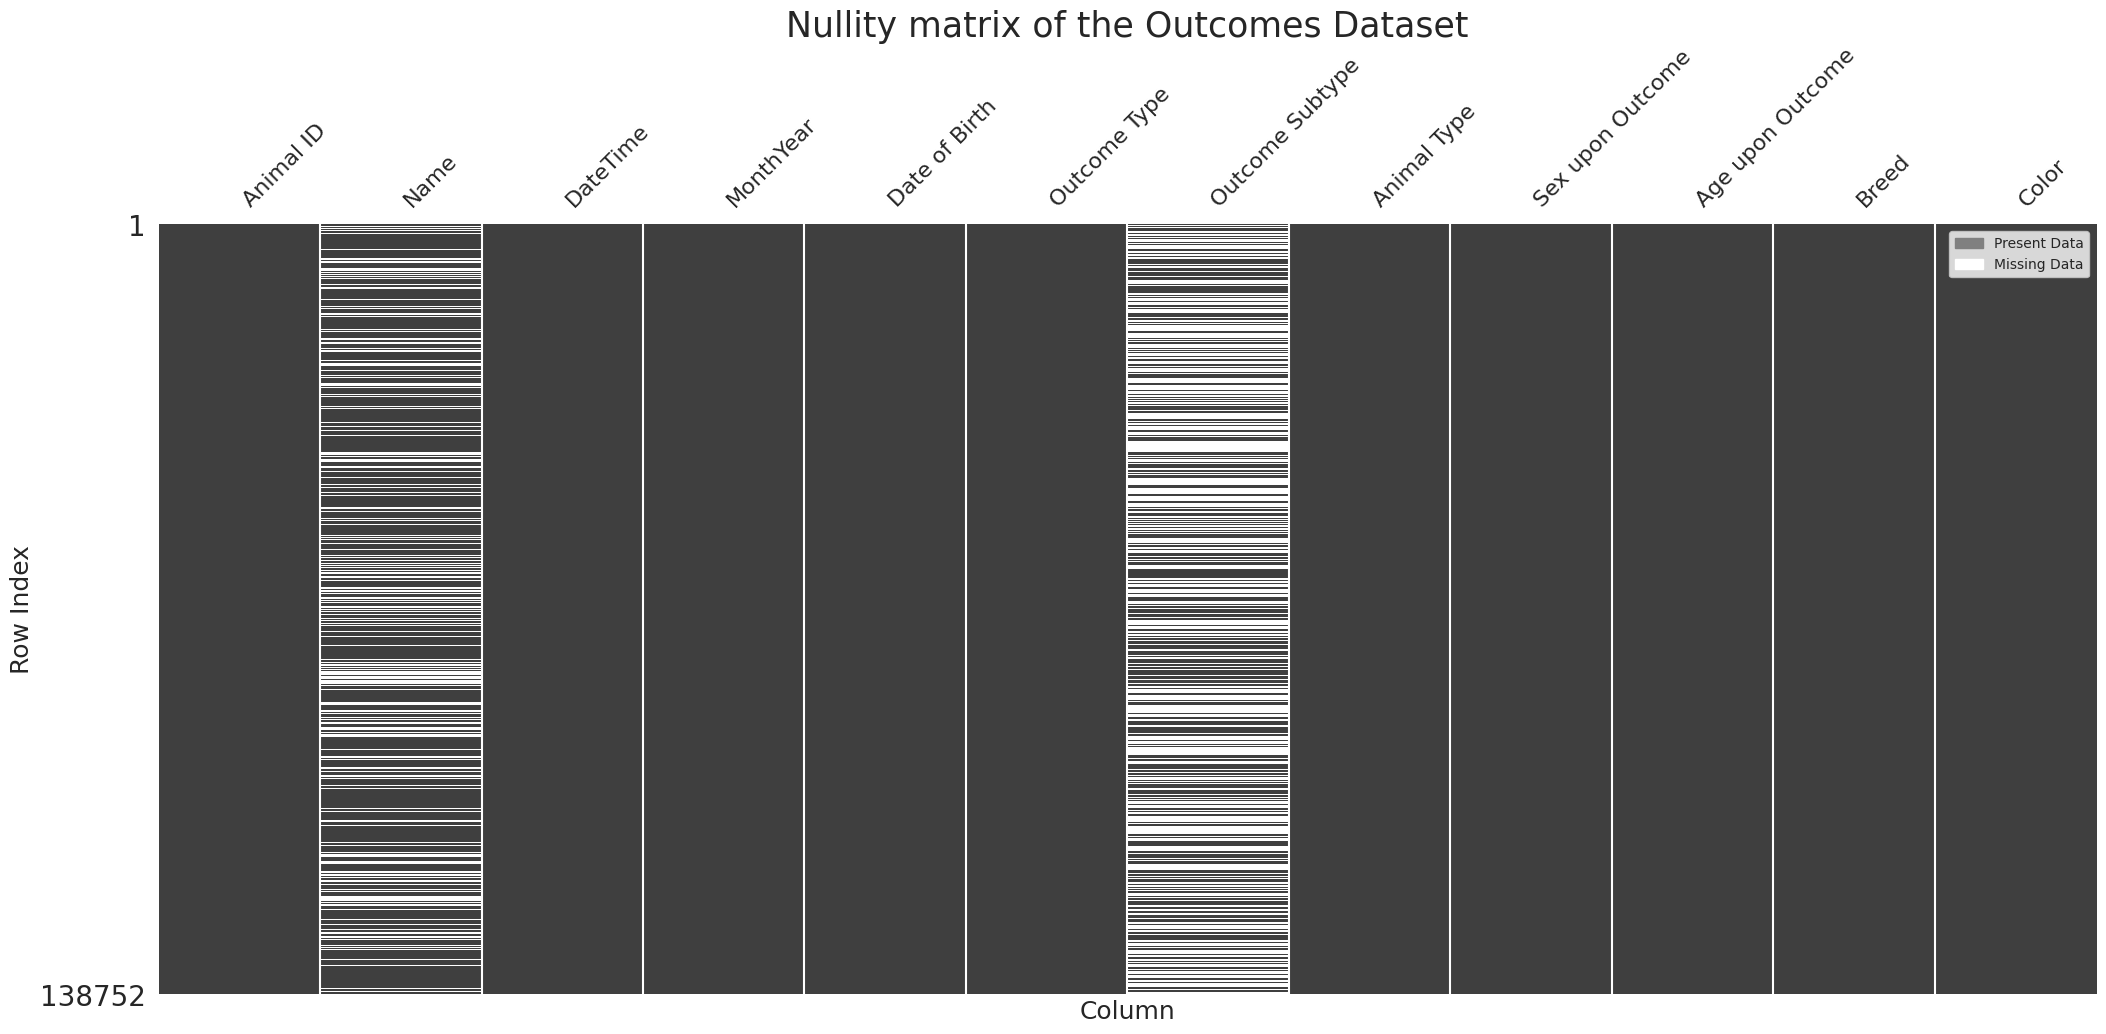

In [12]:
ax = msno.matrix(outcomes, sparkline=False)
ax.set_title('Nullity matrix of the Outcomes Dataset',{'fontsize':25})
ax.legend(handles=[mpatches.Patch(color='gray', label='Present Data'), 
                    mpatches.Patch(color='white', label='Missing Data')], 
                    bbox_to_anchor=(1,1), fontsize=10)
ax.set_ylabel('Row Index',{'fontsize':18})
ax.set_xlabel('Column',{'fontsize':18})

Dataset outcomes obsahuje 12 príznakov. Všetky sú reprezentované ako reťazce. Chýbajú hodnoty príznakov `Name`, `Outcome Type`, `Outcome Subtype`, `Sex upon Outcome`, `Age upon Outcome`. Z grafu je možné vyčítať, že okrem príznakov `Name` a `Outcome Subtype` je počet chýbajúcich hodnôt minimálny (počet chýbajúcich hodnôt je dostatočne malý na to, aby v grafe nebol pozorovateľný).

## Príznaky
Každému príznaku priradíme jeho typ. Ten zistíme výpisom unikátnych hodnôt. Vyšetríme, či hodnoty zodpovedajú očakávanému rozsahu a či je dodržaná integrita a konzistencia dát.

In [13]:
def print_feature(dataset: pd.DataFrame, n=5) -> None:
    """Helper function that prints the number of unique values and lists first n unique values"""
    for col in dataset.columns:
        unique_vals = dataset[col].unique()
        # Column name
        print(col)
        print(f'Unikátne hodnoty: {unique_vals.size}')
        print(unique_vals[:n])
        print(30*'-')

In [14]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [15]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [16]:
print_feature(intakes)

Animal ID
Unikátne hodnoty: 123890
['A786884' 'A706918' 'A724273' 'A665644' 'A682524']
------------------------------
Name
Unikátne hodnoty: 23545
['*Brock' 'Belle' 'Runster' nan 'Rio']
------------------------------
DateTime
Unikátne hodnoty: 97442
['01/03/2019 04:19:00 PM' '07/05/2015 12:59:00 PM'
 '04/14/2016 06:43:00 PM' '10/21/2013 07:59:00 AM'
 '06/29/2014 10:38:00 AM']
------------------------------
MonthYear
Unikátne hodnoty: 103
['January 2019' 'July 2015' 'April 2016' 'October 2013' 'June 2014']
------------------------------
Found Location
Unikátne hodnoty: 58367
['2501 Magin Meadow Dr in Austin (TX)' '9409 Bluegrass Dr in Austin (TX)'
 '2818 Palomino Trail in Austin (TX)' 'Austin (TX)'
 '800 Grove Blvd in Austin (TX)']
------------------------------
Intake Type
Unikátne hodnoty: 6
['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request']
------------------------------
Intake Condition
Unikátne hodnoty: 15
['Normal' 'Sick' 'Injured' 'Pregnant' 'Nursing']
--

#### Rozdelenie príznakov datasetu Intake
##### Kvalitatívne ordinálne príznaky
- Animal ID
##### Kvalitatívne nominálne príznaky
- Name
- Found Location 
- Intake Type 
- Intake Condition
- Animal Type 
- Sex upon Intake
- Breed 
- Color

##### Kvantitatívne intervalové príznaky
- DateTime
- MonthYear
##### Kvantitatívne diskrétne príznaky
- Age upon Intake

In [17]:
print_feature(outcomes)

Animal ID
Unikátne hodnoty: 124068
['A794011' 'A776359' 'A821648' 'A720371' 'A674754']
------------------------------
Name
Unikátne hodnoty: 23426
['Chunk' 'Gizmo' nan 'Moose' 'Princess']
------------------------------
DateTime
Unikátne hodnoty: 115364
['05/08/2019 06:20:00 PM' '07/18/2018 04:02:00 PM'
 '08/16/2020 11:38:00 AM' '02/13/2016 05:59:00 PM'
 '03/18/2014 11:47:00 AM']
------------------------------
MonthYear
Unikátne hodnoty: 103
['May 2019' 'Jul 2018' 'Aug 2020' 'Feb 2016' 'Mar 2014']
------------------------------
Date of Birth
Unikátne hodnoty: 7576
['05/02/2017' '07/12/2017' '08/16/2019' '10/08/2015' '03/12/2014']
------------------------------
Outcome Type
Unikátne hodnoty: 10
['Rto-Adopt' 'Adoption' 'Euthanasia' 'Transfer' 'Return to Owner']
------------------------------
Outcome Subtype
Unikátne hodnoty: 27
[nan 'Partner' 'Foster' 'SCRP' 'Out State']
------------------------------
Animal Type
Unikátne hodnoty: 5
['Cat' 'Dog' 'Other' 'Bird' 'Livestock']
---------------

#### Rozdelenie príznakov datasetu Outcome
##### Kvalitatívne ordinálne príznaky
- Animal ID 
##### Kvalitatívne nominálne príznaky
- Name
- Outcome Type
- Outcome Subtype
- Animal Type 
- Sex upon Outcome
- Breed 
- Color

##### Kvantitatívne intervalové príznaky
- DateTime
- MonthYear
- Date of Birth
##### Kvantitatívne diskrétne príznaky
- Age upon Outcome

Každú kategóriu spracujeme samostatne. 

Pre každý príznak budeme
- pretypovávať príznak na vhodný dátový typ
- kontrolovať rozsah hodnôt (pomocou ktorého by som mohol odhaliť chyby v dátach)
- overovať, či hodnoty používajú jednotný formát
- overovať dátovú integritu v prípade, ak príznaky majú vzťah s inými príznakmi
- riešiť problém chýbajúcich hodnôt

### Kvantitatívne intervalové príznaky
Príznak `DateTime` je intervalový priznak. Výpisom prvých pár hodnôt zistíme formát, v ktorom sú údaje uložené a ten použijeme pri konvertovaní dát na *datetime*.

In [18]:
display(intakes[['DateTime']].head())
outcomes[['DateTime']].head()

,DateTime
0,01/03/2019 04:19:00 PM
1,07/05/2015 12:59:00 PM
2,04/14/2016 06:43:00 PM
3,10/21/2013 07:59:00 AM
4,06/29/2014 10:38:00 AM


,DateTime
0,05/08/2019 06:20:00 PM
1,07/18/2018 04:02:00 PM
2,08/16/2020 11:38:00 AM
3,02/13/2016 05:59:00 PM
4,03/18/2014 11:47:00 AM


In [19]:
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], format="%m/%d/%Y %I:%M:%S %p")
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], format="%m/%d/%Y %I:%M:%S %p")

In [20]:
def column_range(data: pd.DataFrame):
    """Print Min, Max values of series"""
    print(f'Min: {data.min()}')
    print(f'Max: {data.max()}')

In [21]:
column_range(intakes['DateTime'])

Min: 2013-10-01 07:51:00
Max: 2022-04-27 07:54:00


In [22]:
column_range(outcomes['DateTime'])

Min: 2013-10-01 09:31:00
Max: 2022-04-26 18:41:00


Príznak `DateTime` udáva dátum a čas vytvorenia záznamu. Neobsahuje žiadne chýbajúce hodnoty, má správny dátový typ (datetime), ktorý zároveň zabezpečuje dátovú konzistenciu. Rozsah neodhalil chybné medzné hodnoty.  

Nasleduje príznak `MonthYear`.  Príznak pretypujeme na *datetime*.

In [23]:
intakes['MonthYear'] = pd.to_datetime(intakes['MonthYear'], format='%B %Y')
outcomes['MonthYear'] = pd.to_datetime(outcomes['MonthYear'], format='%b %Y')

Z predchádzajúcich výpisov sme vypozorovali, že príznak obsahuje mesiac a rok, ktorý sa nachádza v `DateTime`. Overíme si, či tento vzťah je platný pre všetky záznamy (budeme hľadať záznamy, v ktorých tento vzťah neplatí).

In [24]:
print('Neočakávané dáta v intakes:', intakes[
    (intakes['MonthYear'].dt.month != intakes['DateTime'].dt.month) & 
    (intakes['MonthYear'].dt.year != intakes['DateTime'].dt.year)].shape[0])

print('Neočakávané dáta v outcomes:',outcomes[
    (outcomes['MonthYear'].dt.month != outcomes['DateTime'].dt.month) & 
    (outcomes['MonthYear'].dt.year != outcomes['DateTime'].dt.year)].shape[0])

Neočakávané dáta v intakes: 0
Neočakávané dáta v outcomes: 0


`MonthYear` obsahuje redundantné informácie, ktoré sú obsiahnuté v `DateTime`, preto stĺpec z datasetu odstránime.

In [25]:
intakes = intakes.drop('MonthYear', axis=1)
outcomes = outcomes.drop('MonthYear', axis=1)

Posledným intervalovým príznakom je `Date of Birth`, ktorý prekonvertujeme na *datetime*.

In [26]:
outcomes[['Date of Birth']].head()

,Date of Birth
0,05/02/2017
1,07/12/2017
2,08/16/2019
3,10/08/2015
4,03/12/2014


In [27]:
outcomes['Date of Birth'] = pd.to_datetime(outcomes['Date of Birth'], format='%m/%d/%Y')
column_range(outcomes['Date of Birth'])

Min: 1991-09-22 00:00:00
Max: 2022-04-24 00:00:00


`Date of Birth` je príznak, ktorý zachytáva dátum narodenia zvieraťa. Rozsah neodhalil chybné medzné hodnoty. 

`Date of Birth` je vo vzťahu s príznakom `DateTime`. Každá hodnota `Date of Birth` <=  `DateTime`, pretože zviera nemohlo byť opustiť útulok pred narodením (rovnosť pripúštam v prípade, ak sa zviera narodilo v útulku).

In [28]:
outcomes[outcomes['Date of Birth'] > outcomes['DateTime']]

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
647,A788866,NaN,2019-02-15 12:02:00,2019-12-06,Adoption,NaN,Dog,Neutered Male,0 years,German Shepherd/Catahoula,Black Brindle
1696,A737397,Jellybean,2016-11-05 18:16:00,2016-11-15,Adoption,NaN,Cat,Intact Female,0 years,Domestic Shorthair Mix,White/Orange
4235,A804197,NaN,2019-09-11 18:24:00,2019-09-12,Transfer,Partner,Cat,Intact Female,0 years,Domestic Shorthair,Black/White
9362,A757376,Gorda,2017-09-05 19:25:00,2019-11-05,Rto-Adopt,NaN,Dog,Spayed Female,-2 years,Miniature Schnauzer Mix,White
23563,A745085,Keira,2017-03-13 18:11:00,2017-10-11,Adoption,NaN,Dog,Spayed Female,0 years,Australian Cattle Dog Mix,White
25207,A834123,Colt,2021-05-14 13:09:00,2021-07-04,Transfer,Partner,Dog,Neutered Male,0 years,Great Pyrenees,White/Tan
34746,A802049,NaN,2019-07-16 00:00:00,2019-07-17,Euthanasia,At Vet,Cat,Intact Male,0 years,Domestic Shorthair,White
52867,A751749,Juan,2014-09-10 17:29:00,2014-12-12,Adoption,NaN,Dog,Neutered Male,0 years,Border Collie Mix,Black/White
60898,A757376,Gorda,2018-10-21 19:01:00,2019-11-05,Return to Owner,NaN,Dog,Spayed Female,-1 years,Miniature Schnauzer Mix,White
63725,A736114,NaN,2016-10-04 15:13:00,2016-10-28,Transfer,Partner,Cat,Intact Male,0 years,Domestic Shorthair Mix,Orange Tabby


V datasete existujú záznamy zvierat, ktoré boli odovzdané ešte pred samotným narodením a majú záporný vek. Narušujú dátovú integritu, a preto ich z datasetu odstránime.

In [29]:
outcomes = outcomes.drop(outcomes[outcomes['Date of Birth'] > outcomes['DateTime']].index)

### Kvantitatívne diskrétne príznaky
Príznaky `Age upon Outcome` a `Age upon Intake` prekonvertujeme na numerickú hodnotu. Z prvotnej analýzy datasetu vieme, že `Age upon Outcome` obsahuje chýbajúce hodnoty. Tie dokážeme nahradiť pomocou: (`DateTime` - `Date of Birth`).

In [30]:
#https://stackoverflow.com/questions/29177498/replace-nan-in-one-column-with-value-from-corresponding-row-of-second-column
indexes = outcomes[outcomes['Age upon Outcome'].isna()]
indexes = indexes[['Animal ID']]
outcomes.loc[outcomes['Age upon Outcome'].isna(), 'Age upon Outcome'] = (outcomes['DateTime'] - outcomes['Date of Birth']).dt.days / 365
outcomes[outcomes['Animal ID'].isin(indexes['Animal ID'].unique())]

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
138063,A854611,NaN,2022-04-06 17:16:00,2020-04-06,Euthanasia,Rabies Risk,Other,Unknown,2.0,Raccoon,Gray/Black
138296,A853907,Oscar,2022-04-13 13:48:00,2006-03-27,Euthanasia,Suffering,Cat,Neutered Male,16.057534,Domestic Shorthair,Blue/White
138359,A855204,Bat,2022-04-15 07:43:00,2021-04-14,Euthanasia,Rabies Risk,Other,Unknown,1.00274,Bat,Brown
138675,A855808,NaN,2022-04-23 16:04:00,2020-04-23,Euthanasia,Rabies Risk,Other,Unknown,2.0,Bat,Brown
138708,A855822,A855822,2022-04-25 16:14:00,2009-04-25,Euthanasia,Suffering,Dog,Neutered Male,13.008219,Chow Chow Mix,Tan


`Age upon Outcome` je potrebné prekonvertovať na numerickú hodnotu. Rozhodol som sa vek prepočítať na počet rokov. Keďže dáta nemajú jednotný formát, pretypovávať ich budem vlastnou funkciou. Pre správne spracovanie záznamov potrebujem zistiť, aké nečíselné reťazce sa v záznamoch nachádzajú.

In [31]:
# get unique values from Age upon Outcome and filter out numbers
print(set([item for n in set(outcomes['Age upon Outcome'].unique()) for item in str(n).split(" ") if not item.isnumeric()]))

{'month', '1.0027397260273974', 'year', 'weeks', '13.008219178082191', '2.0', '16.057534246575344', 'days', 'day', 'years', 'months', 'week'}


In [32]:
def normalize_age_upon(data: pd.DataFrame) -> None:
    """Return the age in days"""
    # data from 'Date of Birth'
    if(isinstance(data, int) or isinstance(data, float)):
        return data
        
    # original data
    number,text = data.split(" ")
    text = text.lower()
    number_of_years = 0
    if text in 'years':
        number_of_years =  float(number)
    elif text in 'months':
        number_of_years = float(number) / 12
    elif text in 'weeks':
        number_of_years = float(number) / 52
    elif text in 'days':
        number_of_years = float(number) / 365
    return number_of_years

In [33]:
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].apply(normalize_age_upon)

In [34]:
column_range(outcomes['Age upon Outcome'])

Min: 0.0
Max: 30.0


Rovnakým spôsobom prekonvertujeme aj `Age upon Intake`. Predtým si overíme, či neobsahuje textové reťazce, ktoré sa nenachádzali v outcomes (potom by bolo potrebné upraviť normalize_age_upon)

In [35]:
# get all unique string values from Age upon Intake and filter out numbers
print(set([item for n in set(intakes['Age upon Intake'].unique()) for item in str(n).split(" ") if not item.isnumeric()]))

{'month', '-3', 'year', 'weeks', 'days', 'day', '-2', 'years', 'months', '-1', 'week'}


In [36]:
intakes[intakes['Age upon Intake'].str.startswith('-')]

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
12599,A687107,Montopolis,2017-10-04 10:22:00,East Riverside Drive And Montopolis Drive in A...,Stray,Normal,Dog,Neutered Male,-1 years,Rhod Ridgeback,Red/Brown
49643,A797495,Ace,2019-06-14 11:34:00,6814 East Riverside Drive in Austin (TX),Stray,Normal,Dog,Neutered Male,-1 years,Cairn Terrier,Black/Tan
59806,A687107,Montopolis,2017-06-19 13:26:00,7140 E Ben White in Austin (TX),Stray,Normal,Dog,Neutered Male,-1 years,Rhod Ridgeback,Red/Brown
77603,A757376,Gorda,2017-09-01 16:49:00,6807 Blue Dawn Trl in Austin (TX),Stray,Normal,Dog,Intact Female,-2 years,Miniature Schnauzer Mix,White
81295,A753893,Chato,2015-06-26 16:30:00,6709 Ponca Street in Austin (TX),Stray,Normal,Dog,Intact Male,-1 years,American Bulldog Mix,White/Brown
93575,A687107,Montopolis,2018-02-27 17:00:00,400 West Parson in Manor (TX),Stray,Normal,Dog,Neutered Male,-1 years,Rhod Ridgeback,Red/Brown
102222,A687107,Montopolis,2016-02-12 00:58:00,1005 Valdez St in Austin (TX),Stray,Normal,Dog,Neutered Male,-3 years,Rhod Ridgeback,Red/Brown
123269,A757376,Gorda,2018-10-13 13:42:00,Austin (TX),Public Assist,Normal,Dog,Spayed Female,-1 years,Miniature Schnauzer Mix,White


Z predchádzajúcej bunky sme zistili, že existujú záznamy s negatívnym `Age upon Intake`. To narúša dátovú integritu. Chýbajúce hodnoty nahradíme hodnotami z `Date of Birth`.

In [37]:
indexes = intakes[intakes['Age upon Intake'].str.startswith('-')]['Animal ID'].unique()
print('Chýba:', set(indexes) - set(intakes[intakes['Animal ID'].isin(outcomes['Animal ID'].unique())]['Animal ID'].unique()))

Chýba: {'A757376'}


Zviera s Animal ID 'A757376' sa nenachádza v outcomes. Jeho vek nie je možné získať, preto ho odstránime.

In [38]:
intakes = intakes.drop(intakes[intakes['Animal ID'] == 'A757376'].index)

In [39]:
# Replace missing values in intakes with values from Date of Birth
indexes = intakes[intakes['Age upon Intake'].str.startswith('-')]['Animal ID'].unique()
values = outcomes[outcomes['Animal ID'].isin(indexes)][['Animal ID', 'Date of Birth']]
intakes = pd.merge(intakes, values, on='Animal ID', how='left')

In [40]:
#Inspired by: https://stackoverflow.com/questions/29177498/replace-nan-in-one-column-with-value-from-corresponding-row-of-second-column
intakes.loc[intakes['Animal ID'].isin(indexes), 'Age upon Intake'] = (intakes['DateTime'] - intakes['Date of Birth']).dt.days / 365
intakes=intakes.drop(['Date of Birth'], axis=1)

In [41]:
intakes['Age upon Intake'] = intakes['Age upon Intake'].apply(normalize_age_upon).apply(lambda x: round(x,3))
column_range(intakes['Age upon Intake'])

Min: -3.093
Max: 30.0


Z rozsahu hodnôt je možné vyčítať, že existujú záznamy s negatívnym vekom.

In [42]:
intakes[intakes['Age upon Intake'] < 0]

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
12595,A687107,Montopolis,2017-10-04 10:22:00,East Riverside Drive And Montopolis Drive in A...,Stray,Normal,Dog,Neutered Male,-1.449,Rhod Ridgeback,Red/Brown
12596,A687107,Montopolis,2017-10-04 10:22:00,East Riverside Drive And Montopolis Drive in A...,Stray,Normal,Dog,Neutered Male,-1.449,Rhod Ridgeback,Red/Brown
49637,A797495,Ace,2019-06-14 11:34:00,6814 East Riverside Drive in Austin (TX),Stray,Normal,Dog,Neutered Male,-1.510,Cairn Terrier,Black/Tan
59799,A687107,Montopolis,2017-06-19 13:26:00,7140 E Ben White in Austin (TX),Stray,Normal,Dog,Neutered Male,-1.742,Rhod Ridgeback,Red/Brown
59800,A687107,Montopolis,2017-06-19 13:26:00,7140 E Ben White in Austin (TX),Stray,Normal,Dog,Neutered Male,-1.742,Rhod Ridgeback,Red/Brown
81281,A753893,Chato,2015-06-26 16:30:00,6709 Ponca Street in Austin (TX),Stray,Normal,Dog,Intact Male,-1.047,American Bulldog Mix,White/Brown
81282,A753893,Chato,2015-06-26 16:30:00,6709 Ponca Street in Austin (TX),Stray,Normal,Dog,Intact Male,-1.047,American Bulldog Mix,White/Brown
93563,A687107,Montopolis,2018-02-27 17:00:00,400 West Parson in Manor (TX),Stray,Normal,Dog,Neutered Male,-1.049,Rhod Ridgeback,Red/Brown
93564,A687107,Montopolis,2018-02-27 17:00:00,400 West Parson in Manor (TX),Stray,Normal,Dog,Neutered Male,-1.049,Rhod Ridgeback,Red/Brown
102211,A687107,Montopolis,2016-02-12 00:58:00,1005 Valdez St in Austin (TX),Stray,Normal,Dog,Neutered Male,-3.093,Rhod Ridgeback,Red/Brown


Problematické záznamy majú zvieratá, ktorých vek bol nahradený hodnotou z `Date of Birth`. Skutočný vek nedokážeme z dát získať, preto tieto záznamy odstránime.

In [43]:
intakes = intakes.drop(intakes[intakes['Age upon Intake'] < 0].index)
column_range(intakes['Age upon Intake'])

Min: 0.0
Max: 30.0


### Kategorické nominálne príznaky
Zvyšné príznaky sú kategorické. Tie pretypujeme na dátový typ "categorical". Zároveň odstránime chýbajúce hodnoty a overíme jednotný formát dát. 

Keďže časť príznakov je rovnaká pre oba datasety, vytvoríme jeden dátový typ pre oba príznaky. Aby bolo zaručené, že príznaky nadobúdajú rovnaké/podobné hodnoty, zistíme množinové rozdiely unikátnych hodnôt príznakov. 

Pre zjednodušenie procesu si príznaky rozdelíme podľa toho, či sa nachádzajú v oboch datasetoch.

In [44]:
# Classify columns
intakes_unique = ['Found Location', 'Intake Type', 'Intake Condition']
outcomes_unique = ['Outcome Type', 'Outcome Subtype']
intakes_same = ['Name', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color']
outcomes_same = ['Name', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color']

In [45]:
def convert_to_cat(datasets:pd.DataFrame, cols:pd.Series) -> None:
    """Create categorical datatype from the columns and convert them""" 
    all_cat = []
    
    # names are the same
    if isinstance(cols, str):
        cols = [cols, cols]
        
    # create list of unique values 
    for i, dataset in enumerate(datasets):
        all_cat += set(dataset[cols[i]].unique())
    
    # combine values
    all_cat = set(all_cat)
    
    # create categorical data type
    cat = CategoricalDtype(categories=all_cat)

    # convert columns to categorical data type
    for i, dataset in enumerate(datasets):
        dataset[cols[i]] = dataset[cols[i]].astype(cat)

In [46]:
def print_cat_info(dataset:pd.DataFrame, column:pd.Series, length=20)->None:
    """Print information about unique values"""
    n_unique = dataset[column].nunique()
    n_missing = dataset[dataset[column].isna()].shape[0]
    print(column)
    print(f'Počet unikátnych hodnôt: {n_unique}')
    print(f'Počet chýbajúcich hodnôt: {n_missing} ({n_missing / dataset[[column]].shape[0]}%)')
    print(f'Unikátne hodnty: {dataset[column].unique().tolist()[:min(length, n_unique)]}')
    print(30*'-')

In [47]:
def cmp_cat(dataset1:pd.DataFrame, col1:pd.Series, dataset2:pd.DataFrame, col2:pd.Series):
    """Compare unique values"""
    print("Počet rozdielnych hodnôt:", len((set(dataset1[col1].unique()) - set(dataset2[col2].unique()))) + len((set(dataset2[col2].unique()) - set(dataset1[col1].unique()))))

Začneme s unikátnymi kategorickými príznakmi.

In [48]:
# check unique values
for col in intakes_unique:
    print_cat_info(intakes, col)   

Found Location
Počet unikátnych hodnôt: 58364
Počet chýbajúcich hodnôt: 0 (0.0%)
Unikátne hodnty: ['2501 Magin Meadow Dr in Austin (TX)', '9409 Bluegrass Dr in Austin (TX)', '2818 Palomino Trail in Austin (TX)', 'Austin (TX)', '800 Grove Blvd in Austin (TX)', '415 East Mary Street in Austin (TX)', '2112 East William Cannon Drive in Austin (TX)', 'Braker Lane And Metric in Travis (TX)', '6600 Elm Creek in Austin (TX)', '8800 South First Street in Austin (TX)', 'Galilee Court And Damita Jo Dr in Manor (TX)', '9705 Thaxton in Austin (TX)', '4424 S Mopac Expwy in Austin (TX)', '208 Beaver St in Austin (TX)', '3110 Guadalupe Street in Austin (TX)', '6118 Fairway in Austin (TX)', 'South First And Stassney in Austin (TX)', '1501 S Fm 973 in Austin (TX)', '1801 Westridge in Austin (TX)', '6111 Softwood Drive in Austin (TX)']
------------------------------
Intake Type
Počet unikátnych hodnôt: 6
Počet chýbajúcich hodnôt: 0 (0.0%)
Unikátne hodnty: ['Stray', 'Owner Surrender', 'Public Assist', 'Wi

In [49]:
# Convert to categorical data type
for col in intakes_unique:
    convert_to_cat([intakes], col)   

Príznak `Intake Condition` nadobúda hodnoty "Med Attn", "Med Urgent", "Panleuk", ktoré označujú to, čo "Medical". Tieto kategórie zjednotíme a nahradíme za "Medical".

In [50]:
intakes['Intake Condition'] = intakes['Intake Condition'].replace('Med Urgent', 'Medical')
intakes['Intake Condition'] = intakes['Intake Condition'].replace('Med Attn', 'Medical')
intakes['Intake Condition'] = intakes['Intake Condition'].replace('Panleuk', 'Medical')

In [51]:
for col in outcomes_unique:
    print_cat_info(outcomes, col)   

Outcome Type
Počet unikátnych hodnôt: 9
Počet chýbajúcich hodnôt: 23 (0.0001657932486105805%)
Unikátne hodnty: ['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer', 'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate']
------------------------------
Outcome Subtype
Počet unikátnych hodnôt: 26
Počet chýbajúcich hodnôt: 75310 (0.5428647631679485%)
Unikátne hodnty: [nan, 'Partner', 'Foster', 'SCRP', 'Out State', 'Suffering', 'Underage', 'Snr', 'Rabies Risk', 'In Kennel', 'Offsite', 'Aggressive', 'Enroute', 'At Vet', 'In Foster', 'Behavior', 'Medical', 'Field', 'Possible Theft', 'Barn']
------------------------------


Záznamy s chýbajúcimi hodnotami z `Outcome type` odstránime. Kategórie "Transfer" a "Relocate" označujú to isté, preto kategórie zjednotíme a nahradíme za "Transfer".

Príznaku `Outcome Subtype` chýba viac ako polovica záznamov, preto je pri ďalšej analýze tento príznak málo použiteľný.

Nájdené chyby opravíme a príznaky prekonvertujeme.

In [52]:
outcomes['Outcome Type'] = outcomes['Outcome Type'].replace("Relocate", "Transfer")

In [53]:
outcomes = outcomes.dropna(subset=['Outcome Type'])
outcomes['Outcome Subtype'] = outcomes['Outcome Subtype'].astype('category') 
outcomes['Outcome Type'] = outcomes['Outcome Type'].astype('category') 

Kategorické príznaky, ktoré sa nachádzadzajú v oboch datasetoch:

In [54]:
for i in range(len(intakes_same)):
    print_cat_info(intakes, intakes_same[i])
    print_cat_info(outcomes, outcomes_same[i])
    cmp_cat(intakes, intakes_same[i], outcomes, outcomes_same[i])

Name
Počet unikátnych hodnôt: 23544
Počet chýbajúcich hodnôt: 41265 (0.2978110723796739%)
Unikátne hodnty: ['*Brock', 'Belle', 'Runster', nan, 'Rio', 'Odin', 'Beowulf', '*Ella', 'Mumble', '*Casey', '*Candy Cane', '*Pearl', 'Ziggy', 'Tommy', 'Tulip', '*Mint', '*Twilight', 'Stumpy', 'Rheia', 'Baby']
------------------------------
Name
Počet unikátnych hodnôt: 23425
Počet chýbajúcich hodnôt: 41232 (0.29726612065982233%)
Unikátne hodnty: ['Chunk', 'Gizmo', nan, 'Moose', 'Princess', 'Quentin', '*Donatello', '*Zeus', 'Tulip', 'Artemis', 'Fiona', '*Mary', '*Birch', 'Luigi', '*Liza', 'Einstein', 'Star', 'Millie', 'Big Girl', 'Theodore Nubbins']
------------------------------
Počet rozdielnych hodnôt: 311
Animal Type
Počet unikátnych hodnôt: 5
Počet chýbajúcich hodnôt: 0 (0.0%)
Unikátne hodnty: ['Dog', 'Cat', 'Other', 'Bird', 'Livestock']
------------------------------
Animal Type
Počet unikátnych hodnôt: 5
Počet chýbajúcich hodnôt: 0 (0.0%)
Unikátne hodnty: ['Cat', 'Dog', 'Other', 'Bird', 'Liv

Z výpisu pozorujeme, že príznaku `Name` chýba 30% hodnôt a tie, ktoré nechýbajú, môžu byť chybné (napríklad začínajú *). Meno zvieraťa nepredstavuje dôležitú informáciu, pretože každé zviera je jednoznačne identifikovateľné pomocou `Animal ID`. Preto príznaky odstránime z oboch datasetov. 

`Sex upon Intake` a `Sex upon Outcomes` obsahujú chýbajúce hodnoty ako np.nan a "Unknown". Pre zachovanie dátovej konzistencie nahradíme výskyty "Unknown" za np.nan. Záznamy s chýbajúcimi hodnotami odstránime. 

In [55]:
# Remove Name
intakes = intakes.drop('Name', axis=1)
outcomes = outcomes.drop('Name', axis=1)
intakes_same.remove('Name')
outcomes_same.remove('Name')

In [56]:
# Replace all Unknown data to np.nan
intakes['Sex upon Intake'] = intakes['Sex upon Intake'].replace('Unknown',np.nan)
outcomes['Sex upon Outcome'] = outcomes['Sex upon Outcome'].replace('Unknown',np.nan)

intakes = intakes.dropna(subset=['Sex upon Intake'])
outcomes = outcomes.dropna(subset=['Sex upon Outcome'])

In [57]:
# Convert data to categorical
for i in range(len(intakes_same)):
    convert_to_cat([intakes, outcomes], [intakes_same[i], outcomes_same[i]])

### Kategorické ordinálne príznaky
Príznak `Animal ID` konvertujeme a zachováme jeho prirodzené usporiadanie.

In [58]:
#Convert Animal ID to categorical 
ids = intakes['Animal ID'].unique().tolist()
ids += outcomes['Animal ID'].unique().tolist()
ids = list(set(ids))
ids.sort()
cat = CategoricalDtype(categories=ids, ordered=True)
intakes['Animal ID'] = intakes['Animal ID'].astype(cat)
outcomes['Animal ID'] = outcomes['Animal ID'].astype(cat)

## Zhrnutie čistenia dát

In [59]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127494 entries, 0 to 138571
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         127494 non-null  category      
 1   DateTime          127494 non-null  datetime64[ns]
 2   Found Location    127494 non-null  category      
 3   Intake Type       127494 non-null  category      
 4   Intake Condition  127494 non-null  category      
 5   Animal Type       127494 non-null  category      
 6   Sex upon Intake   127494 non-null  category      
 7   Age upon Intake   127494 non-null  float64       
 8   Breed             127494 non-null  category      
 9   Color             127494 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(1)
memory usage: 12.3 MB


In [60]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127659 entries, 0 to 138768
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         127659 non-null  category      
 1   DateTime          127659 non-null  datetime64[ns]
 2   Date of Birth     127659 non-null  datetime64[ns]
 3   Outcome Type      127659 non-null  category      
 4   Outcome Subtype   53526 non-null   category      
 5   Animal Type       127659 non-null  category      
 6   Sex upon Outcome  127659 non-null  category      
 7   Age upon Outcome  127659 non-null  float64       
 8   Breed             127659 non-null  category      
 9   Color             127659 non-null  category      
dtypes: category(7), datetime64[ns](2), float64(1)
memory usage: 10.4 MB


In [61]:
intakes_AnimalID = set(intakes['Animal ID'].unique())
outcomes_AnimalId = set(outcomes['Animal ID'].unique())

print(f'Intakes: {len(intakes_AnimalID)}')
print(f'Outcomes: {len(outcomes_AnimalId)}')
print(f'Dokopy: {len(intakes_AnimalID.union(outcomes_AnimalId))}')

Intakes: 112833
Outcomes: 113010
Dokopy: 113643


- Datasety obsahujú 138561 (intakes) a 138704 (outcomes) záznamov
- V datasete sa nachádza 124703 zvierat z toho 123889 zvierat v intakes a  124042 v outcomes
- chýbajúce dáta sa nachádzajú v príznakoch `Sex upon Intake`(7%) , `Outcome Subtype` (52%), `Sex upon Outcome` (7%)
- Dataset intakes obsahuje 9 príznakov
    - Kvantitatívne
        - DateTime: dátum vytvorenia záznamu 
        - Age upon Intake: vek zvieraťa v čase prijatia do útulku (v rokoch)
    - Kvalitatívne
        - Animal ID: identifikačné číslo zvieraťa
        - Found Location: miesto nájdenia zvieraťa
        - Intake Type: dôvod prijatia zvieraťa do útulku
        - Intake Condition: stav v čase prijatia do útulku
        - Animal Type: druh zvieraťa
        - Sex upon Intake: pohlavie zvieraťa a jeho sterilita
        - Breed: konkrétnejší druh zvieraťa
        - Color: farba zvieraťa
- Dataset outcomes obsahuje 9 príznakov
    - Kvantitatívne
        - DateTime: dátum vytvorenia záznamu 
        - Age upon Outcome: vek zvieraťa v čase odchodu z útulku (v rokoch)
        - Date of Birth: dátum narodenia zvieraťa
    - Kvalitatívne
        - Animal ID: identifikačné číslo zvieraťa
        - Outcome Type: dôvod prepustenia zvieraťa z útulku
        - Outcome Subtype : detailnejší popis dôvodu prepustenia      
        - Animal Type: druh zvieraťa
        - Sex upon Outcome: pohlavie zvieraťa
        - Breed: konkrétnejší druh zvieraťa
        - Color: farba zvieraťa
- Kvantitatívne príznaky majú primeraný rozsah
- je zachovaná dátova konzistencia
- Je zachovaná dátová integrita
- z pôvodných datasetov boli odstránené
    - duplicitné záznamy
    - príznaky `MonthYear`,`Name`, ktoré obsahovali duplicitné informácie
    - záznamy, ktoré obsahovali chýbajúce/chybné hodnoty.

# 2. Deskriptívne štatistiky

## 1. DateTime
`DateTime` je kvantitatívny príznak. Deskriptívne štatistiky budú pozostávať z mediánu, kvartilov, minimálnej hodnoty, maximálnej hodnoty, rozsahu hodnôt a rozloženia hodnôt. Keďže ide o intervalový príznak, ktorý nemá definované operácie *+* a */*, nebudeme zisťovať priemer, smerodajnú odchýlku, šikmosť ani špicatosť. Rozloženie hodnôt budeme vizualizovať pomocou grafov boxplot, violinplot a histogramu. 

In [62]:
def numerical_stats(dataset, all_stats = True):
    """Perform descriptive statistics on numerical data"""
    df = pd.DataFrame({'Min': [ dataset.min()],
                        'Max':  [dataset.max()],
                        '25%':  [dataset.quantile(0.25)],
                        '50%':  [dataset.median()],
                        '75%':  [dataset.quantile(0.75)],
                        'IQR':  [dataset.quantile(0.75) - dataset.quantile(0.25)],
                        'Min - Max': [ dataset.max() - dataset.min()]})
    if all_stats:
        tmp_df = pd.DataFrame({'Priemer' :[dataset.mean()], 
                            'Rozptyl' :[dataset.var()], 
                            'Smerodajná odchýlka' :[dataset.std()], 
                            'Koef. šikmosti' :[dataset.skew()], 
                            'Koef. špičatosti' :[dataset.kurtosis()]})
        tmp_df = tmp_df.round()
        df = df.join(tmp_df)
    return df.melt(var_name = 'Metric', value_name =  'Data') 

In [63]:
def numerical_plot(dataset, col, title, ticks, label, ticks_label=None, p_figsize=(6,6), violin=True):
    """Plot Boxplot and Violinplot"""

    # Create ticks
    if ticks_label == None:
        ticks_label = ticks

    fig,ax  = plt.subplots(1,2, tight_layout=True, figsize=p_figsize)
    fig.suptitle(title)

    # Boxplot
    sns.boxplot(data=dataset, y=col, ax=ax[0])
    ax[0].set_yticks(ticks)
    ax[0].set_yticklabels(ticks_label)
    ax[0].set_ylabel(label)
    sns.despine(ax=ax[0], left=True)
    
    # Violin plot
    if not violin:
        ax[1].set_visible(False)
        return
        
    sns.violinplot(data=dataset, y=col, ax=ax[1])
    ax[1].set_yticks(ticks)
    ax[1].set_yticklabels(ticks_label)
    ax[1].set_ylabel(label)
    #ax[1].grid(False)
    sns.despine(ax=ax[1], left=True)
    

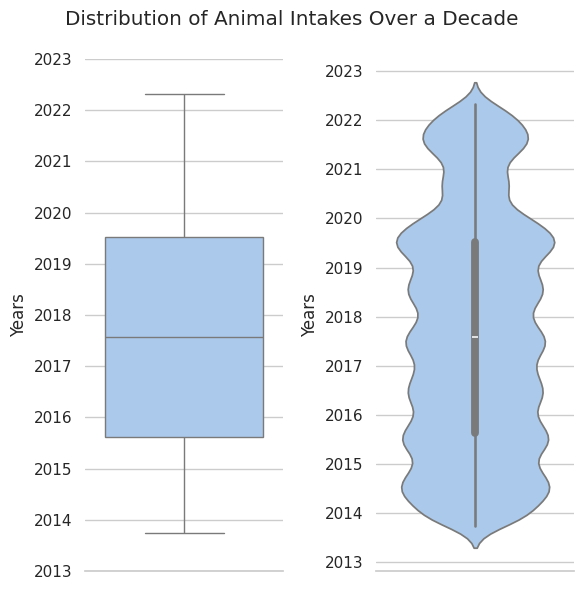

In [64]:
ticks = [date(i,1,1) for i in range(2013, 2024)]
# Boxplot ViolinPlot
numerical_plot(intakes,'DateTime', 'Distribution of Animal Intakes Over a Decade', ticks,'Years', [item.year for item in ticks])

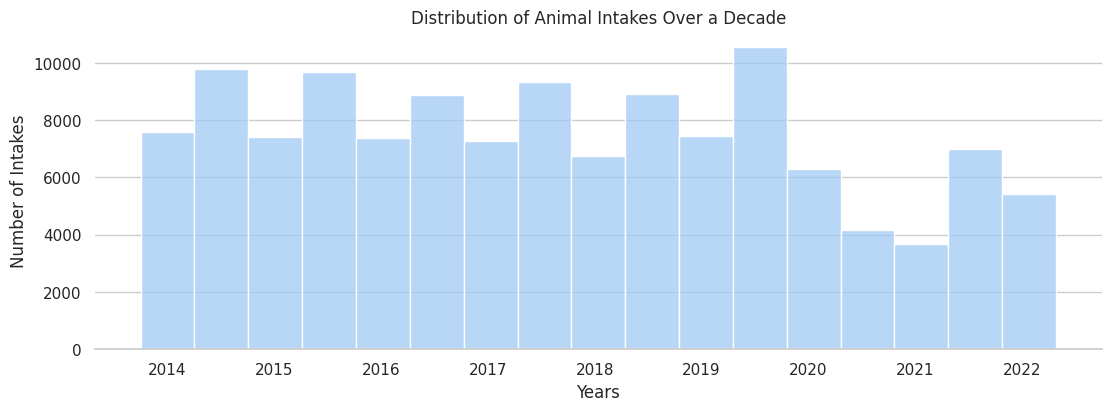

In [65]:
# Histplot
fig,ax  = plt.subplots(1,1, constrained_layout=True, figsize=(11,4))
# Sturges rule,
bins = 1 + np.log2(intakes.shape[0])
sns.histplot(data=intakes, x='DateTime', ax=ax, bins=int(bins))
ax.set_ylabel('Number of Intakes')
ax.set_xlabel('Years')
ax.set_title('Distribution of Animal Intakes Over a Decade')
ax.grid(axis='x')
sns.despine(ax=ax, left=True)

In [66]:
numerical_stats(intakes['DateTime'], all_stats=False)

,Metric,Data
0,Min,2013-10-01 07:51:00
1,Max,2022-04-27 07:54:00
2,25%,2015-08-16 15:52:15
3,50%,2017-07-31 09:34:30
4,75%,2019-07-13 06:10:00
5,IQR,1426 days 14:17:45
6,Min - Max,3130 days 00:03:00


Dataset obsahuje záznamy od 3.10 2013 do 24.7. 2022. Polovica dát leží medzi augustom 2015 a júlom 2019. Z grafov je možné vyčítať, že väčšina dát pochádza z obdobia 2014-2019. Najvyšší počet zvierat útulok prijal v roku 2019 a najnižší v roku 2020.

## 2. Age upon Intake

`Age upon Intake` je disktrétny kvantitatívny príznak. Okrem vyššie spomenutých vlastností dát bude deskriptívna štatistika obsahovať mieru variability (priemer, smerodajnú odchýlku, šikmosť a špičatosť).

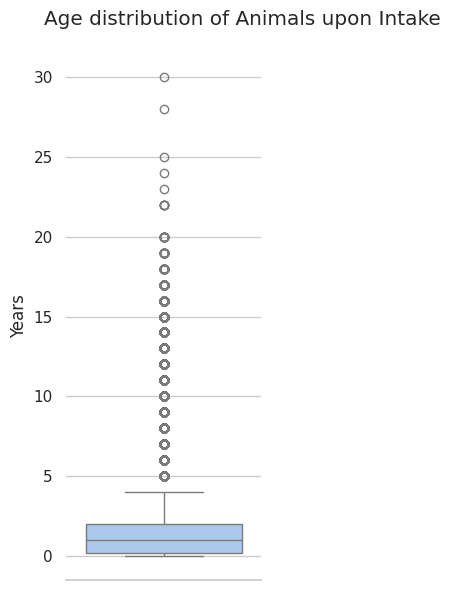

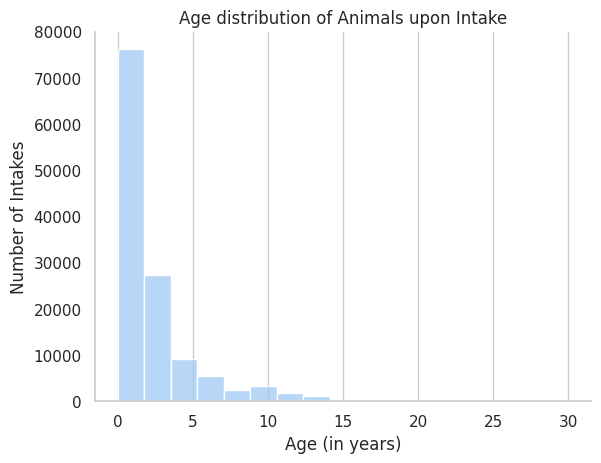

In [67]:
numerical_plot(intakes, 'Age upon Intake', 'Age distribution of Animals upon Intake', [item for item in range(0, 35, 5)], 'Years', p_figsize=(5,6), violin=False) 

fig,ax  = plt.subplots()
n_bins = 1 + np.log2(len(intakes['Age upon Intake']))

ax.set_title('Age distribution of Animals upon Intake')
ax.set_ylabel('Number of Intakes')
ax.set_xlabel('Age (in years)')
ticks = [i for i in range(0,35, 5)]
ax.grid(axis='y')
ax.set_xticks(ticks)
sns.histplot(data=intakes, x='Age upon Intake', ax=ax, bins=int(n_bins))
sns.despine(ax=ax)

Z grafov je možné vypozorovať, že príznak obsahuje množstvo odľahlých hodnôt, ktoré znižujú čítateľnosť grafu. Preto odľahlé hodnoty odstránime.

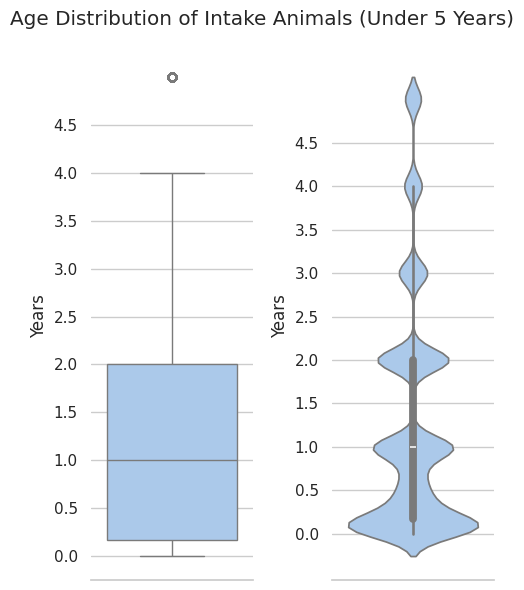

In [68]:
numerical_plot(intakes[intakes['Age upon Intake'] <= 5], 'Age upon Intake', 'Age Distribution of Intake Animals (Under 5 Years)', [item/10 for item in range(0, 50, 5)], 'Years', p_figsize=(5,6), violin=True) 

In [69]:
numerical_stats(intakes['Age upon Intake'])

,Metric,Data
0,Min,0.000
1,Max,30.000
2,25%,0.167
3,50%,1.000
4,75%,2.000
5,IQR,1.833
6,Min - Max,30.000
7,Priemer,2.000
8,Rozptyl,9.000
9,Smerodajná odchýlka,3.000


Distribúcia hodnôt `Age upon Intake` je skosená vpravo. Väčšina prijatých zvierat má menej ako 5 rokov. Najstaršie zviera malo 30 rokov.
Priemerný vek zvieraťa sú 2 roky. Kvôli nerovnomernénu rozloženiu je však priemer skreslený, pretože dataset obsahuje množstvo odľahlých hodnôt
(najlepšie možno pozorovať v prvom grafe). Lepšia metrika bude medián, ktorý je 1 rok. Z histogramu je možné vypozorovať, že dáta nepokrývajú niektoré vekové kategórie (v datasete napríklad nie sú zastúpené zvieratá medzi 2.25-2.5 rokmi). 

## 3. Animal Type

`Animal Type` Je to nominálny kategorický príznak. Deskriptívna analýza bude pozostávať z početnosti, relatívnej početnosti a modusu hodnôt.

In [70]:
def cat_desc(dataset, column, ylabel, pfigsize, pres = 3, title=None):
    """Plot Frequency and Relative Frequency Barplots for categorical data"""
    if title==None:
        title = column
    
    fig, ax = plt.subplots(2,1,tight_layout = True, figsize = pfigsize)

    # Generate relative frequency data
    c_data = dataset[column].value_counts(normalize=True).sort_values(ascending=False)
    c_order = [index for index in c_data.index if c_data[index] > 0] 
    sns.barplot(data = c_data,ax=ax[0], order = c_order)
    ax[0].set_title('Relative Frequency of ' + title)
    dec = .01 * pres
    ax[0].bar_label(ax[0].containers[0],fmt=lambda x: f'{x*100:{dec}f}%')
    ax[0].set_ylabel(f'Proportion of of {ylabel}')
    ax[0].grid(False)
    sns.despine(ax=ax[0], left=True)

    c_data = dataset[column].value_counts().sort_values(ascending=False)
    sns.barplot(data = c_data, ax=ax[1],order=c_order)
    ax[1].set_title('Frequency of ' + title)
    ax[1].bar_label(ax[1].containers[0])
    ax[1].set_ylabel(f'Number of {ylabel}')
    ax[1].grid(False)
    sns.despine(ax=ax[1], left=True)

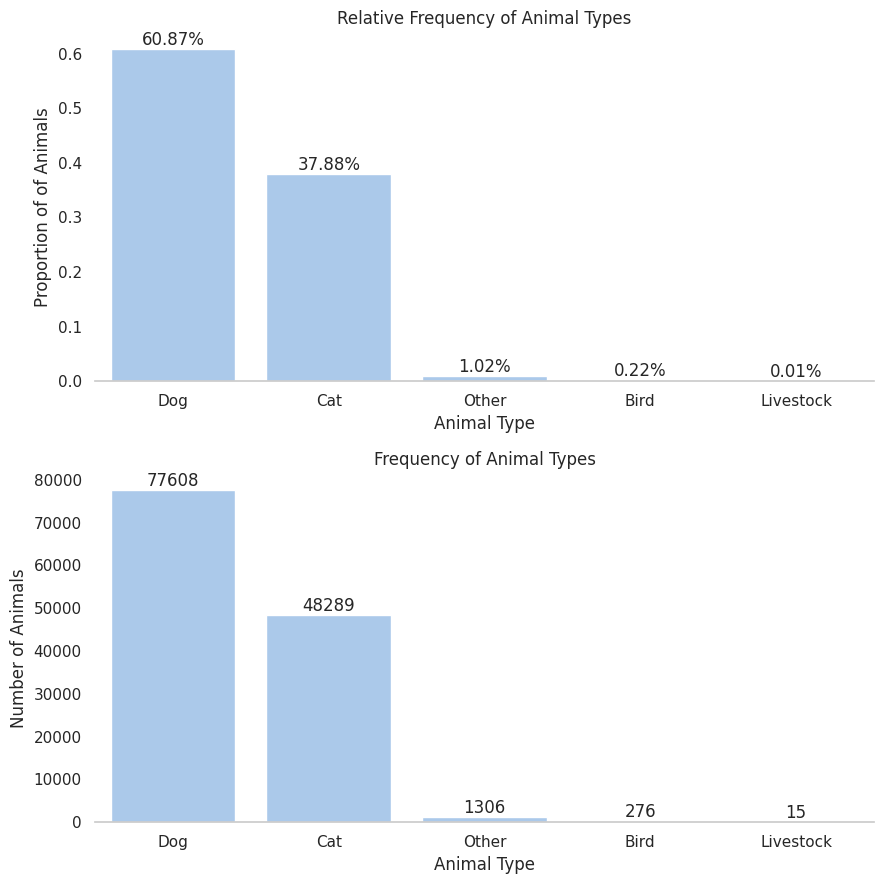

In [71]:
cat_desc(intakes, 'Animal Type', 'Animals', pfigsize=(9,9), pres=2, title='Animal Types')

In [72]:
freq_table = intakes[['Animal ID', 'Animal Type']].groupby('Animal Type', observed=False).count()
freq_table['Frequency'] = freq_table['Animal ID']
freq_table.drop('Animal ID', axis=1)

,Frequency
Animal Type,
Dog,77608
Other,1306
Livestock,15
Bird,276
Cat,48289


Útulok eviduje 5 druhov zvierat. Najzastúpenejšie sú psy a mačky. Tie tvoria 94%  zvierat, ktoré sa do útulku dostanú. Treťou najpočetnejšou skupinou sú zvieratá, ktoré sú evidované ako "Other". Vtáky a hospodárske zvieratá  tvoria menej ako 1% všetkých prijatých zvierat. 

## 4. Intake Condition
`Intake Condition` je kategorický nominálny príznak. Analyzovať a vizualizovať ho budeme rovnako ako `Animal Type`.

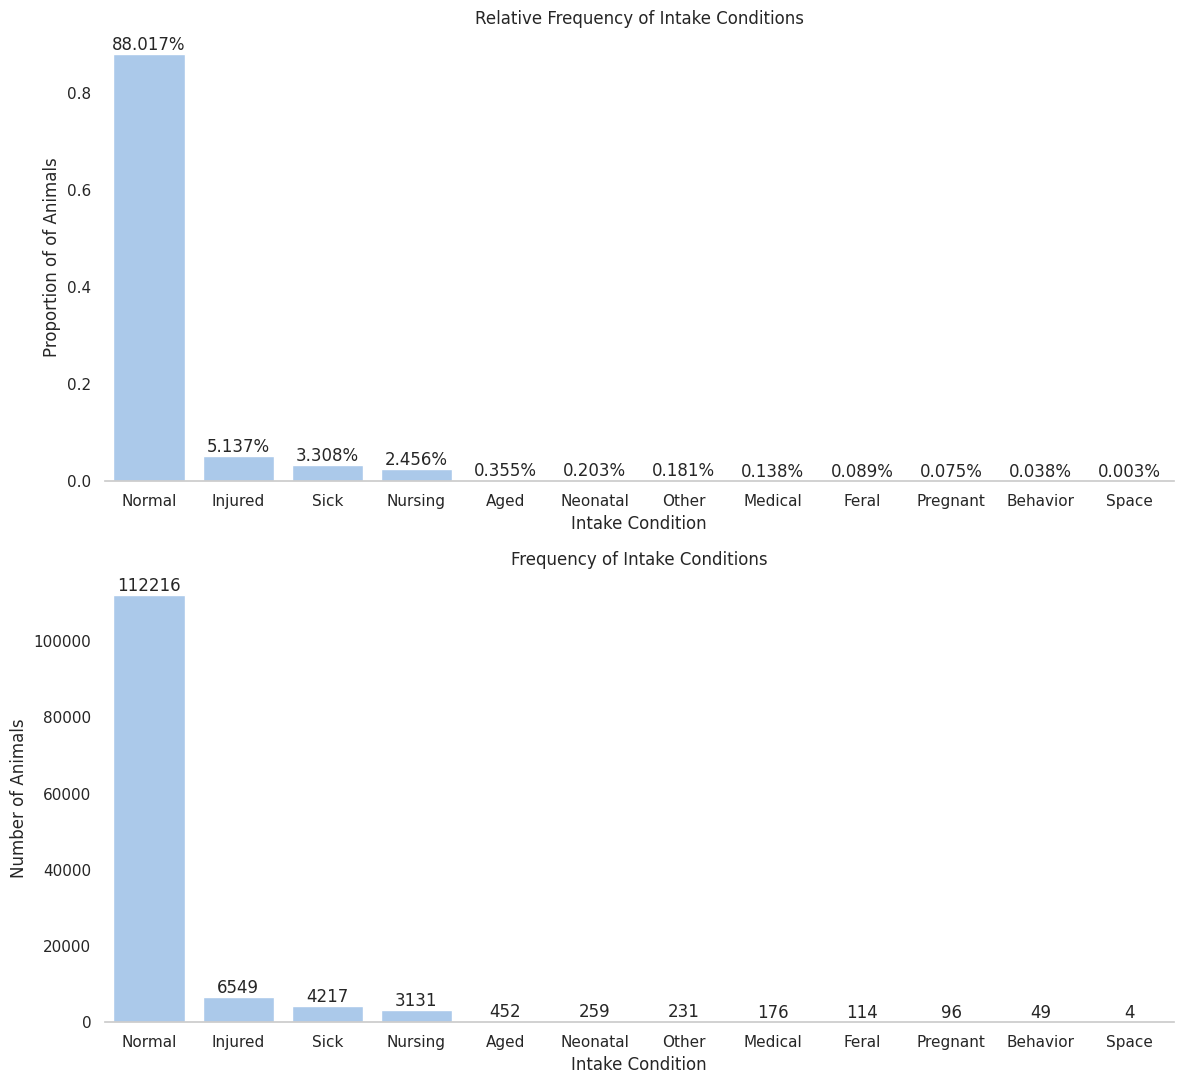

In [73]:
cat_desc(intakes,'Intake Condition', 'Animals', (12,11), title='Intake Conditions',)

Keďže `Intake Condition` obsahuje hodnôty, ktoré tvoria väčšinu datasetu ('Normal', 'Injured', 'Sick', 'Nursing'), zvyšné hodnoty nie sú v grafe viditeľné. Vizualizáciu si rozdelíme na 2 časti. V prvej budeme porovnávať početnosti kategórií, ktoré majú relatívnu početnosť > 1% a zvyšné hodnoty nahradíme novou hodnotou "Other". V druhej časti budeme porovnávať len hodnoty, ktoré spadajú do kategórie "Other".

In [74]:
# conditions with <1% in dataset
cond_count = intakes['Intake Condition'].value_counts(normalize=True)
cond = [condition for condition in cond_count.index if cond_count[condition] < 0.01]

# Create a dataframe with the most significant conditions.
major_cond = intakes[['Intake Condition']].copy()

for condition in cond:
    major_cond['Intake Condition'] = major_cond['Intake Condition'].replace(condition, 'Others')

# Create dataframe with the lest significant conditions
minor_cond = intakes[intakes['Intake Condition'].isin(cond)].value_counts('Intake Condition').sort_values(ascending=False)
major_cond = major_cond.value_counts('Intake Condition').sort_values(ascending=False)

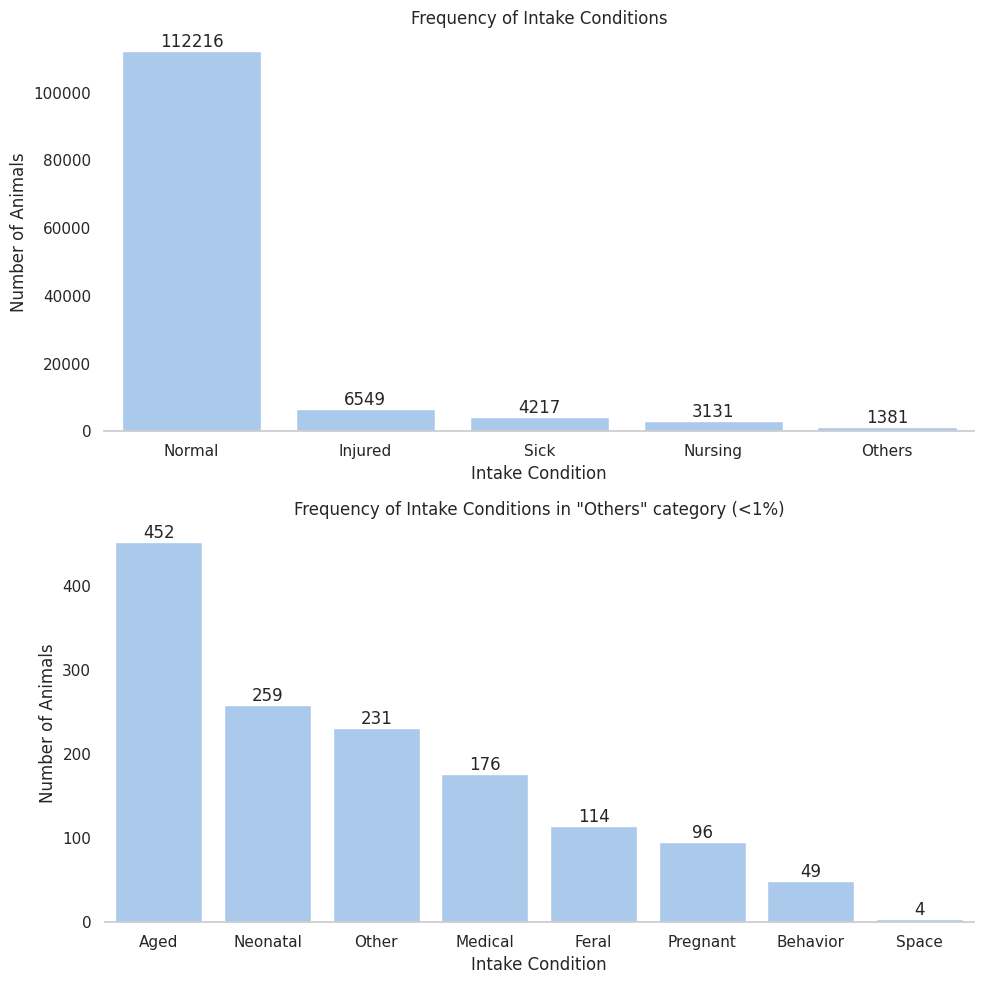

In [75]:
# Plot major
fig, ax = plt.subplots(2,1,tight_layout = True, figsize = (10,10))
major_order = [index for index in major_cond.index if major_cond[index] > 0] 
sns.barplot(data = major_cond, ax=ax[0], order=major_order)
ax[0].set_title('Frequency of Intake Conditions')
ax[0].bar_label(ax[0].containers[0])
ax[0].set_ylabel('Number of Animals')
ax[0].grid(False)
sns.despine(left=True, ax=ax[0])

# Plot minor
minor_order = [index for index in minor_cond.index if minor_cond[index] > 0] 
sns.barplot(data = minor_cond, ax=ax[1],order=minor_order)
ax[1].set_title('Frequency of Intake Conditions in "Others" category (<1%)')
ax[1].bar_label(ax[1].containers[0])
ax[1].set_ylabel('Number of Animals')
ax[1].grid(False)
sns.despine(left=True, ax=ax[1])

In [76]:
freq_table = intakes[['Animal ID', 'Intake Condition']].groupby('Intake Condition', observed=False).count()
freq_table['Frequency'] = freq_table['Animal ID']
freq_table.drop('Animal ID', axis=1)

,Frequency
Intake Condition,
Nursing,3131
Sick,4217
Other,231
Injured,6549
Pregnant,96
Behavior,49
Neonatal,259
Feral,114
Normal,112216


Väčšina zviera, ktoré útulok príjme sú v normálnom stave, zranené alebo choré.

## 3. Outcome Type
`Outcome Type` je kategorický nominálny príznak. Analyzovať ho budeme rovnako ako `Intake Condition` a `Animal Type`.

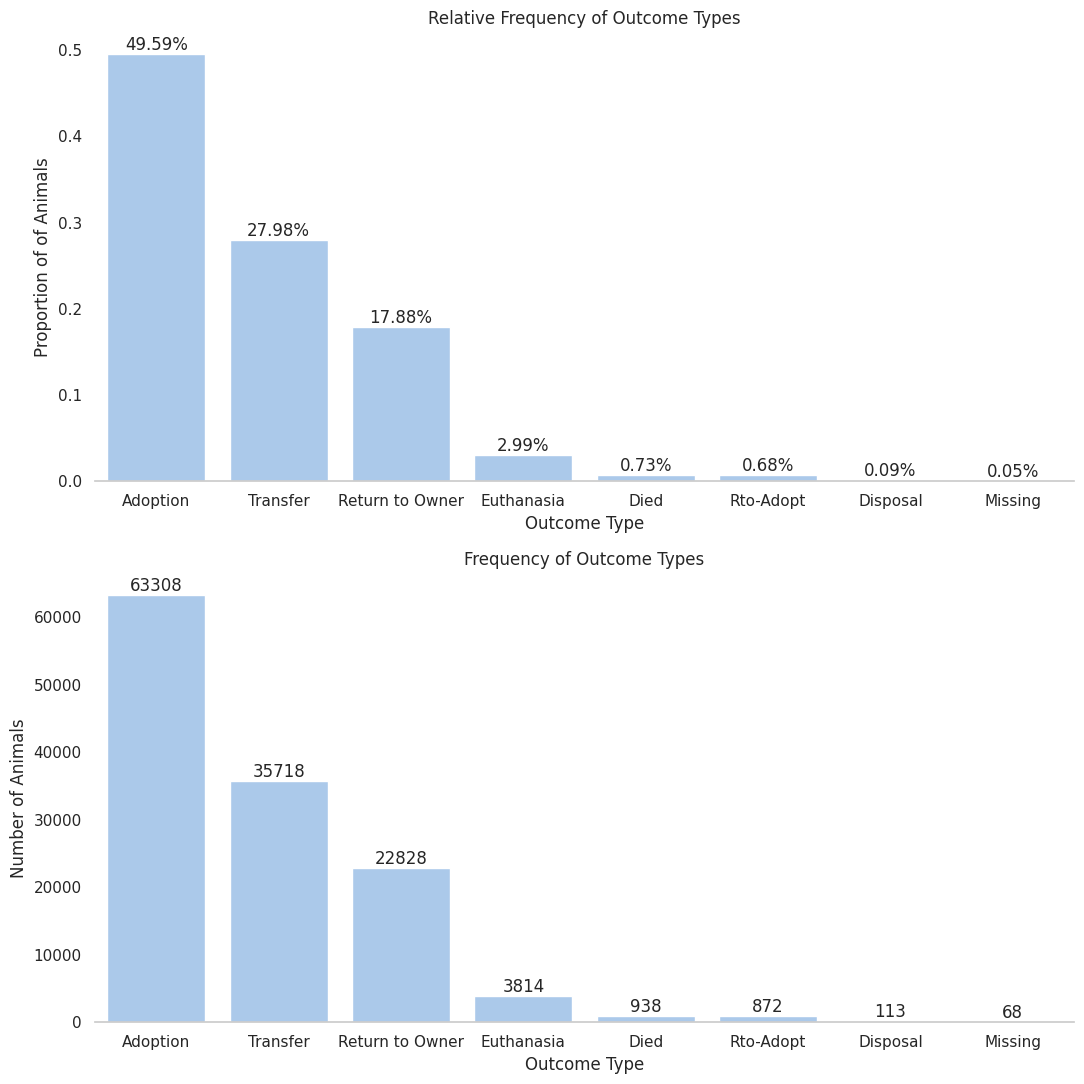

In [77]:
cat_desc(outcomes, 'Outcome Type', ylabel= 'Animals', pfigsize=(11,11), pres=2, title='Outcome Types')

In [78]:
# outcome types with <1% in dataset
type_count = outcomes['Outcome Type'].value_counts(normalize=True)
types = [condition for condition in type_count.index if type_count[condition] < 0.01]

# Create dataframe with uncommon types
common_types = outcomes[['Outcome Type']].copy()

for type in types:
    common_types['Outcome Type'] = common_types['Outcome Type'].replace(type, 'Others')

# Create data with common types
uncommon_types = outcomes[outcomes['Outcome Type'].isin(types)].value_counts('Outcome Type').sort_values(ascending=False)
common_types = common_types.value_counts('Outcome Type').sort_values(ascending=False)

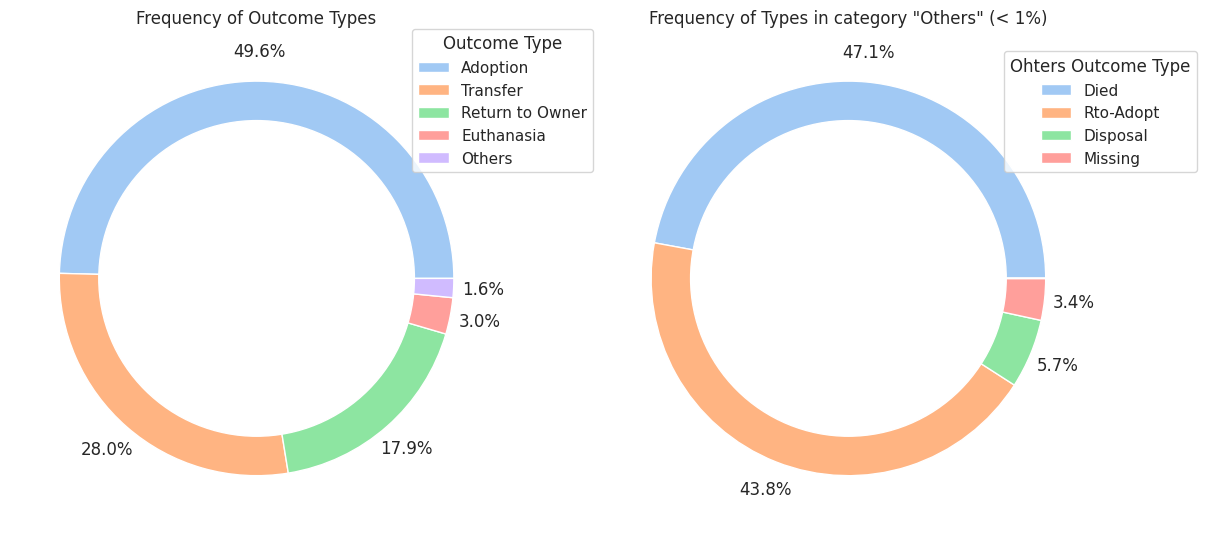

In [79]:
# Plot graphs
#inspired by https://stackoverflow.com/questions/50449628/how-to-remove-0-from-pie-chart
fig, ax = plt.subplots(1,2, figsize=(14,7))
ax[0].pie(common_types, autopct=lambda x: f'{x:.1f}%' if x > 0 else '', pctdistance=1.15)
ax[0].set_title('Frequency of Outcome Types')
my_circle=plt.Circle( (0,0), 0.8, color='white')
ax[0].add_artist(my_circle)
ax[0].legend([index for index in common_types.index.tolist()], title='Outcome Type', bbox_to_anchor=(0.8,0.7)) 

ax[1].pie(uncommon_types, autopct=lambda x: f'{x:.1f}%' if x > 0 else '', pctdistance=1.15)
ax[1].set_title('Frequency of Types in category "Others" (< 1%)')
my_circle=plt.Circle( (0,0), 0.8, color='white')
ax[1].add_artist(my_circle)
ax[1].legend([index for index in uncommon_types.index.tolist() if uncommon_types[index] > 0], title='Ohters Outcome Type', bbox_to_anchor=(0.8,0.7)) 

In [80]:
freq_table = intakes[['Animal ID', 'Intake Condition']].groupby('Intake Condition', observed=False).count()
freq_table['Frequency'] = freq_table['Animal ID']
freq_table.drop('Animal ID', axis=1)

,Frequency
Intake Condition,
Nursing,3131
Sick,4217
Other,231
Injured,6549
Pregnant,96
Behavior,49
Neonatal,259
Feral,114
Normal,112216


Väčšina zvierat, ktoré útulok opustilo, boli adoptované, presunuté do iného útulku, vrátené majiteľovi alebo podstúpili eutanáziu. Najmenej častým dôvodom je útek zvieraťa. Viac ako polovica hodnôt, ktoré príznak nadobúda má relatívnu početnosť <1%, preto som sa rozhodol kategórie opäť rozdeliť. 

## 4. Bivariačná štatistika medzi príznakmi `Outcome Type` a `Animal Type`
`Outcome Type` a `Animal Type` sú kategorické nominálne príznaky, preto bude bivariačná popisná štatistika pozostávať z kontingenčnej tabuľky, pomocou ktorej zistím vzťah medzi príznakmi. Tú budeme vizualizovať pomocou tabuľky relatívnej početnosti a stĺpcového grafu.

In [81]:
display(pd.crosstab(outcomes['Outcome Type'], outcomes['Animal Type'], normalize='columns'))  

Animal Type,Dog,Other,Livestock,Bird,Cat
Outcome Type,,,,,
Adoption,0.483462,0.470138,0.3750,0.485507,0.516635
Died,0.003467,0.013017,0.0000,0.010870,0.013386
Disposal,0.000516,0.006126,0.0000,0.061594,0.000990
Euthanasia,0.023886,0.112557,0.0625,0.090580,0.036879
Missing,0.000412,0.002297,0.0000,0.000000,0.000681
Return to Owner,0.263206,0.027565,0.2500,0.050725,0.048574
Rto-Adopt,0.008894,0.001531,0.0000,0.000000,0.003713
Transfer,0.216157,0.366769,0.3125,0.300725,0.379143


Text(0.5, 1.0, 'Each column represents the 100% of animals with one type')

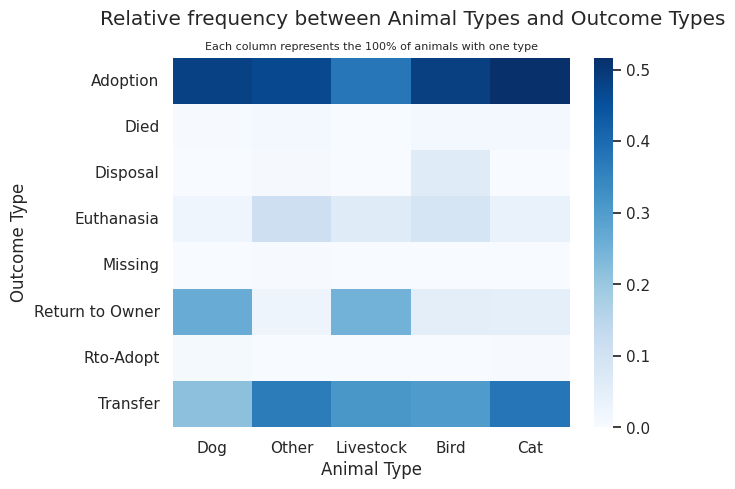

In [82]:
crosstab = pd.crosstab(outcomes['Outcome Type'], outcomes['Animal Type'], normalize='columns')
fig, ax = plt.subplots()
sns.heatmap(crosstab, ax=ax, cmap='Blues')
fig.suptitle('Relative frequency between Animal Types and Outcome Types')
ax.set_title('Each column represents the 100% of animals with one type', fontdict={'fontsize' : 8})

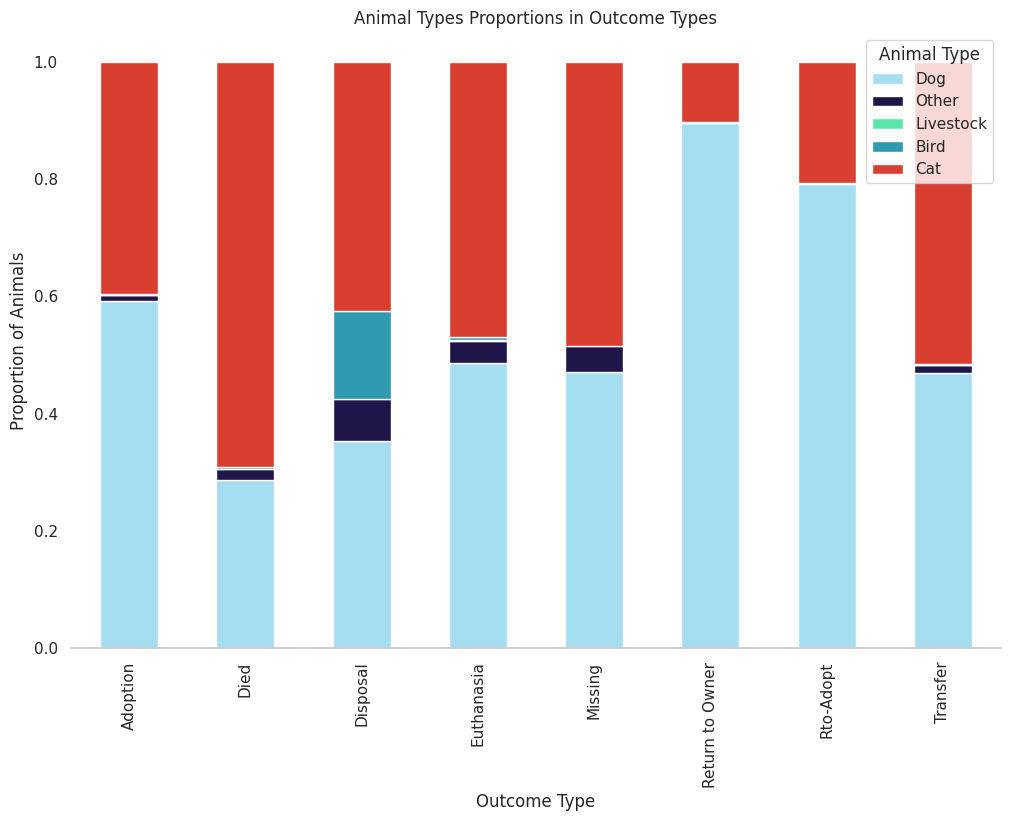

In [83]:
colors = ['#A5DEF1','#1E1548','#5BE7A9','#2E99B0','#D83F31']
crosstab = pd.crosstab(outcomes['Outcome Type'], outcomes['Animal Type'], normalize='index')
crosstab = crosstab.reset_index()
ax = crosstab.plot(kind='bar', stacked=True,  x='Outcome Type', ylabel='Proportion of Animals', title='Animal Types Proportions in Outcome Types',figsize=(12,8),grid=False, color=colors)
sns.despine(ax=ax, left=True)

Z prvého grafu je možné pozorovať, že zvieratá, ktoré útulok opustia boli najčastejšie adoptované alebo presunuté. Najčastejšími vrátenými zvieratami boli hospodárske zvieratá a psy. Druhý graf ukazuje, že hodnotu *Disposal* často nadobúdajú vtáky. 

# 3. Zadané otázky

## 1. Závisí typ odchodu zvierata z útulku (Outcome Type) na typu príchodu (Intake Type)?

Datasety si spojíme do jedného. Z **intakes** a **outcomes** získame len tie zvieratá, ktoré sa nachádzajú v oboch datasetoch (teda existujú informácie o tom kedy zviera prišlo a odišlo). Z týchto zvierat vyberieme tie, ktorých počet prijatí je rovnaký ako počet odchodov. Datasety usporiadame vzostupne podľa `Animal ID` a `DateTime` (získame tak datasety, ktoré majú na rovnakých riadkoch informácie o príchode a odchode toho istého zvieraťa). Datasety spojíme podľa príznaku `Animal ID`.

`Outcome Type` a `Intake Type` sú kategorické príznaky, preto budeme odpoveď hľadať v kontigenčnej tabuľke, ktorú budeme vizualizovať pomocou tabuľky relatívnej početnosti.

In [84]:
# find Animal IDs, that are in intakes and outcomes
only_intakes = intakes[~intakes['Animal ID'].isin(outcomes['Animal ID'].unique())].shape[0]
only_outcomes = outcomes[~outcomes['Animal ID'].isin(intakes['Animal ID'].unique())].shape[0]
print(f"Prienik intakes a outcomes: {intakes[intakes['Animal ID'].isin(outcomes['Animal ID'].unique())].shape[0]}")
print(f'Len v intakes  {only_intakes} ({(only_intakes / intakes.shape[0])*100}%)')
print(f'Len v outcomes  {only_outcomes} ({(only_outcomes / outcomes.shape[0])*100}%)')

Prienik intakes a outcomes: 126861
Len v intakes  633 (0.4964939526565956%)
Len v outcomes  810 (0.6345028552628487%)


Vyberieme si podmnožinu zvierat, ktoré sa nachádzajú v oboch datasetoch.

In [85]:
intakes_a = intakes[intakes['Animal ID'].isin(outcomes['Animal ID'].unique())]
outcomes_a = outcomes[outcomes['Animal ID'].isin(intakes['Animal ID'].unique())]

In [86]:
# Filter out data that 
data_int = intakes_a.value_counts('Animal ID')
data_out = outcomes_a.value_counts('Animal ID')
valid_ids = [id for id in intakes_a['Animal ID'].unique() if data_int[id] == data_out[id]] 
intakes_a = intakes[intakes['Animal ID'].isin(valid_ids)]
outcomes_a = outcomes[outcomes['Animal ID'].isin(valid_ids)]

In [87]:
# Reset indexes and prepare datasets for combining
intakes_a = intakes_a.sort_values(by=['Animal ID', 'DateTime'])
intakes_a = intakes_a.reset_index(drop=True)
intakes_a['DateTime_intake'] = intakes_a['DateTime']
intakes_a = intakes_a.drop(['DateTime'], axis=1)

In [88]:
outcomes_a = outcomes_a.sort_values(by=['Animal ID', 'DateTime'])
outcomes_a = outcomes_a.reset_index(drop=True)
outcomes_a['DateTime_outcome'] = outcomes_a['DateTime']
outcomes_a = outcomes_a.drop(['DateTime'], axis=1)

In [89]:
# Join datasets and filter out unusable data
combined = intakes_a.join(outcomes_a, rsuffix='_out')
combined = combined.drop(combined[combined['DateTime_intake'].dt.date > combined['DateTime_outcome'].dt.date].index)

Text(0.5, 1.0, 'Each Row represents 100% of animals with one type')

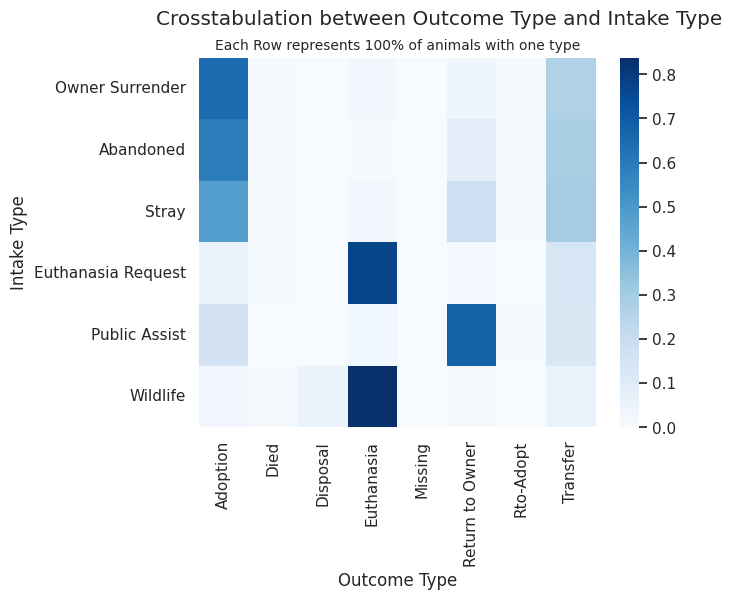

In [90]:
# Plot the data
data = pd.crosstab(combined['Intake Type'], combined['Outcome Type'], normalize='index')
fig, ax = plt.subplots()
sns.heatmap(data, ax=ax, cmap='Blues')
fig.suptitle("Crosstabulation between Outcome Type and Intake Type")
ax.set_title('Each Row represents 100% of animals with one type', fontdict={'fontsize' : 10})

Medzi typom príchodu a odchodu existuje vzťah. 
Z grafu je možné vyčítať, že ak zviera malo dôvod prijatia:
- Public Assist - zvieratá sú najčastejšie vrátené majiteľovi
- Stray - zvieratá sú adoptované alebo presunuté
- Owner surrender - zvieratá sú adoptované alebo presunuté
- Euthanasia request - zvieratá podstúpia eutanáziu 
- Wildslife - zvieratá podstúpia eutanáziu
- Abandoned - zvieratá sú adoptované alebo presunuté do iného útulku

## 2. Je príjem v rámci roku konstantný alebo existujú obdobia s vyššou/nižšou záťažou?

Z príznaku `DateTime` vytvoríme nové príznaky roku a mesiaca. Vypočítame počet prijatých zvierat v jednotlivých mesiacoch. Tieto hodnoty vizualizujeme pomocou stĺpcových grafov. Vytvoríme graf pre každý rok s cieľom overiť či graf za celé obdobie zodpovedá realite.

In [91]:
# Extract parts of datetime
dt_stats = intakes[['DateTime']].copy()
dt_stats['Year'] = dt_stats['DateTime'].dt.year
dt_stats['Month'] = dt_stats['DateTime'].dt.month
dt_stats['Day'] = dt_stats['DateTime'].dt.day

Roky 2013 a 2022 do grafu nezahrnieme, pretože dataset neobsahuje záznamy z celého roku.

In [92]:
years = dt_stats['Year'].unique().tolist()
years.sort()
years.remove(2013)

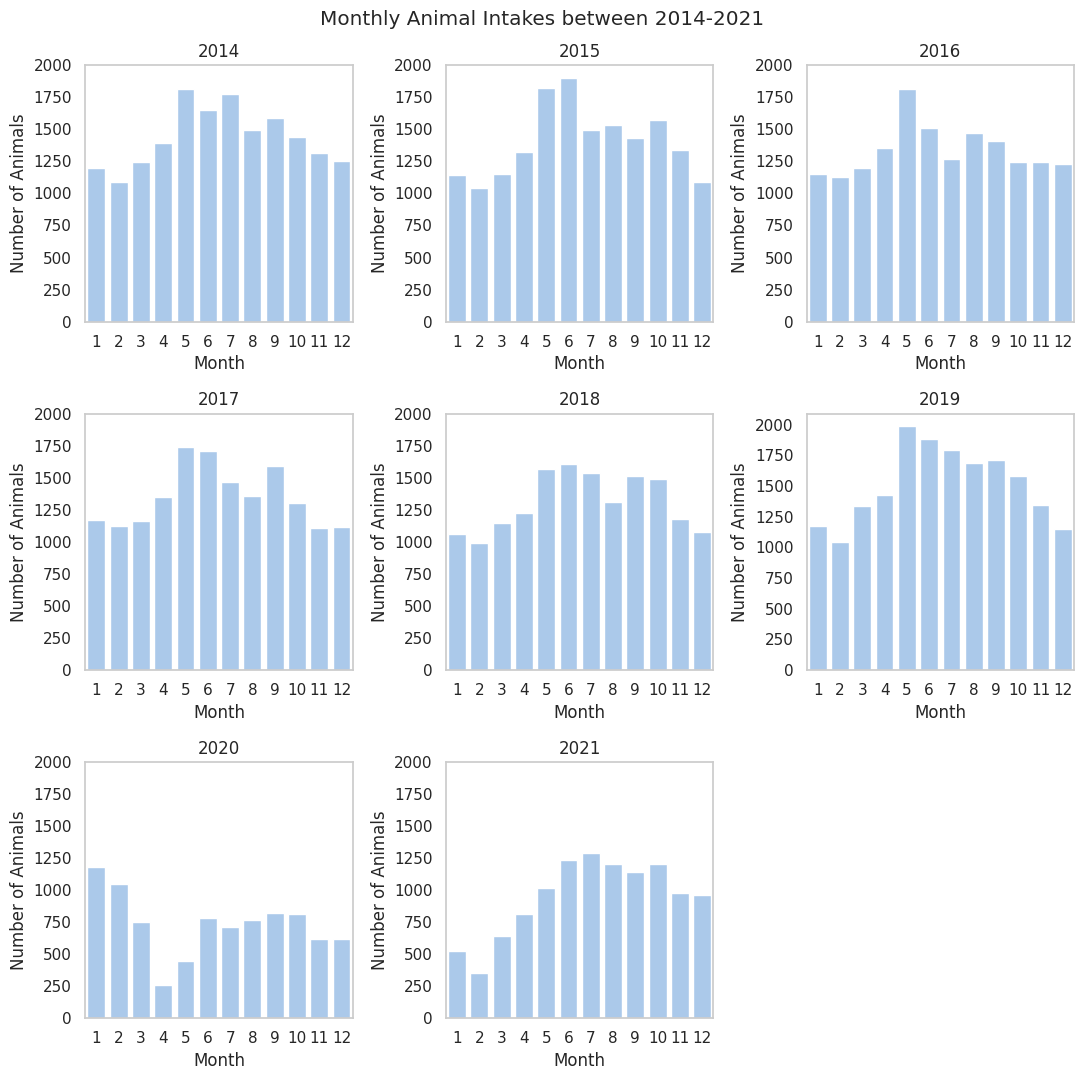

In [93]:
# All years
index = 0
ticks = [i for i in range(0, 2001, 250)]

fig, ax  = plt.subplots(3,3, tight_layout=True, figsize=(11,11))
fig.suptitle('Monthly Animal Intakes between 2014-2021')
for i in range(3):
    for j in range(3):
        sns.barplot(data=dt_stats[dt_stats['Year'] == years[index]].groupby('Month').count(), x='Month', y='DateTime', ax=ax[i][j])
        ax[i][j].set_title(years[index])
        ax[i][j].set_ylabel('Number of Animals')
        ax[i][j].set_yticks(ticks)
        ax[i][j].grid(False)
        index+=1
ax[2][2].set_visible(False)

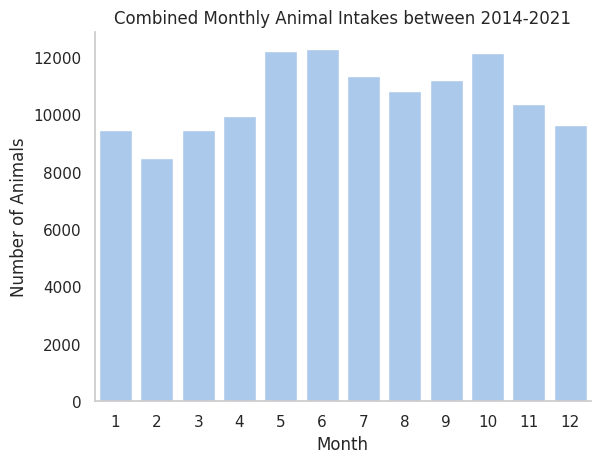

In [94]:
fig, ax = plt.subplots()
sns.barplot(data=dt_stats.groupby('Month').count(), x='Month', y='DateTime', ax=ax)
ax.set_ylabel('Number of Animals')
ax.set_title('Combined Monthly Animal Intakes between 2014-2021')
ax.grid(False)
sns.despine(ax=ax)

Grafy zobrazujú počet prijatých zvierat počas roka za obdobie 2014-2021. V grafoch je vidieť, že najviac zvierat útulok prijal v letných mesiacoch (Máj, Jún, Júl) a v Októbri. Najmenej zvierat útulok prijal počas zimných mesiacov (December, Január, Február). 

Takéto rozloženie prijatých zvierat je možné (s menšími odchýlkami) pozorovať počas všetkých rokov okrem roku 2020. Počet prijatých zvierat bol na začiatku roka porovnateľný s predchádzajúcimi, no po Februári počet prijatých zvierat neobvykle klesol.

## 3. Hraje vek zvieraťa rolu pri adopcii?

Z datasetu **combined**, ktorý sme použili v prvej otázke, získame tú časť zvierat, ktorá bola adoptovaná. Vek týchto zvierat budeme vizualizovať pomocou histogramu veku. Keďže s rastúcim vekom klesá počet zviera v útulku ako takých, počet adoptovaných zvierat porovnám s celkovým počtom zvierat, ktoré útulok opustili.  

In [95]:
# convert dataframe to long format
tmp = combined[['Outcome Type', 'Age upon Outcome']].copy()
for type in combined['Outcome Type'].unique():
    if type == 'Adoption':
        continue
    tmp['Outcome Type'] = tmp['Outcome Type'].replace(type, 'Other')
    
tmp = tmp.melt(id_vars='Outcome Type')

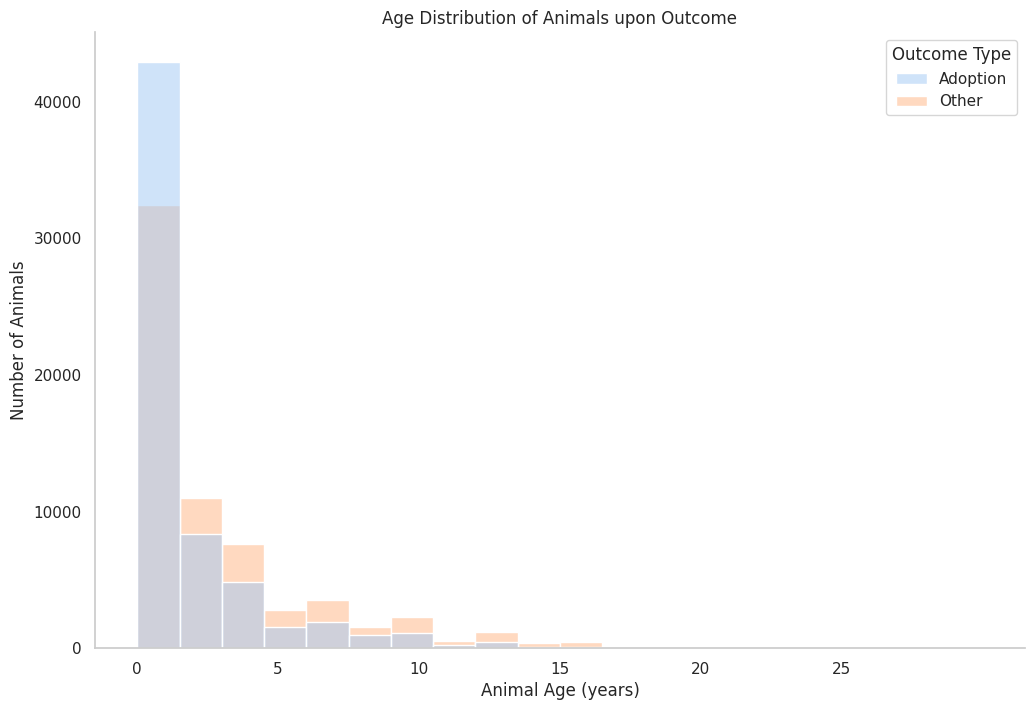

In [96]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=tmp, x='value' ,hue='Outcome Type', bins=20, ax=ax)
ax.set_ylabel('Number of Animals')
ax.set_xlabel('Animal Age (years)')
ax.set_title('Age Distribution of Animals upon Outcome')
ax.set_xticks([i for i in range(0,30, 5)])
ax.grid(False)
sns.despine(ax=ax)

V priloženom histograme je možné vidieť, že čím staršie sú zvieratá, tým väčší je relatívny rozdiel medzi adoptovanými zvieratami a zvieratami, ktoré adoptované neboli. Väčšina adoptovaných zvierat má menej ako 2 roky.

# 4. Vlastné otázky

## 1.Ktorá časť dňa je pre útulok najvyťaženejšia

Na [stránkach](https://www.austintexas.gov/austin-animal-center) útulku je možné nájsť otváracie hodiny útulku: od 7:00 do 19:00. Otázkou je, ktorá časť pracovného dňa je najvyťaženejšia. Na otázku odpovieme pomocou 2 vizualizácií. 

1. Distribúciu záznamov počas jedného dňa vizualizujem pomocou Violin grafu.

2. Deň si rozdelíme na časti **Morning**, **Afternoon**, **Evening** a **Night** a vizualizujeme ich početnosť pomocou prstencového grafu (donut chart).

In [97]:
def checkTime(data):
    """Assign the part of a day"""
    if data.hour >= 5 and data.hour <= 12:
        return 'Morning'
    elif data.hour > 12 and data.hour <= 17:
        return 'Afternoon'
    elif data.hour > 17 and data.hour <= 21:
        return 'Evening'
    else:
        return 'Night'

In [98]:
# Extract the time from the combined dataframe  
dt_stats = combined[['DateTime_intake', 'DateTime_outcome']].copy()
dt_stats = dt_stats.melt()
dt_stats['Day'] = dt_stats['value'].dt.day
dt_stats['Time'] = dt_stats['value'].dt.time.apply(lambda x: (x.hour + x.minute / 60%24))
dt_stats['DayPart'] = dt_stats['value'].copy().apply(checkTime)


days = dt_stats['DayPart'].value_counts(normalize=True)
days = np.array([days['Morning'], days['Afternoon'], days['Evening'], days['Night']])
labels = np.array(['Morning 5:00-12:00', 'Afternoon 12:00-17:00', 'Evening 17:00-21:00', 'Night 21:00-5:00'])

<Axes: title={'center': 'Distribution of Intakes/Outcomes Throughout a Day"'}, xlabel='Number of Intakes/Outcomes', ylabel='Hour'>

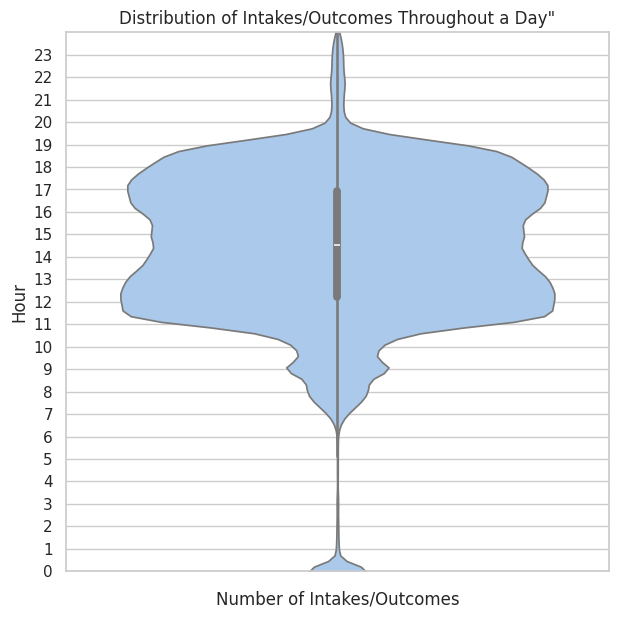

In [99]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Distribution of Intakes/Outcomes Throughout a Day"')
ax.set_xlabel('Number of Intakes/Outcomes')
ax.set_ylabel('Hour')
ax.axis(ymax=24, ymin=0)
ax.set_yticks([i for i in range(24)])
ax.set_yticklabels([i for i in range(24)])
sns.violinplot(dt_stats, y='Time', ax=ax)

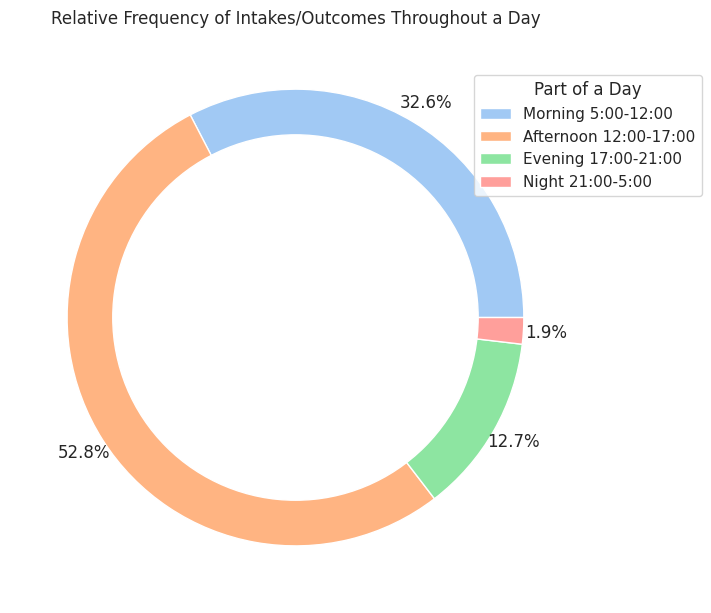

In [100]:
# Donut chart inspired by: https://python-graph-gallery.com/donut-plot/
fig, ax = plt.subplots(figsize=(7,7), constrained_layout=True)
ax.pie(days, autopct='%.01f%%',pctdistance=1.1)
ax.set_title('Relative Frequency of Intakes/Outcomes Throughout a Day')
my_circle=plt.Circle( (0,0), 0.8, color='white')
ax.add_artist(my_circle)
ax.legend(labels, title='Part of a Day', bbox_to_anchor = [0.8,0.7])

Z grafov vidieť, že útulok vykoná väčšinu príjmov a výdajov medzi 11:00 a 18:00 hodinou. Najvyťaženejšie časy sú 12:00 a 17:00. Počet prijatých a odovzdaných zvierat potom klesá, avšak nie do nuly. V grafoch je možné pozorovať, že v datasete má časť dát nesprávne priradený čas alebo útulok vytváral záznamy aj mimo otváracích hodín.

## 2. Ako sa menila zaplnenosť útulku a pomer zvierat v priebehu rokov.
V súčasnosti útulok prijíma zvieratá v urgentných prípadoch kvôli [nedostatočným kapacitám ](https://www.austintexas.gov/lost-found-pets). Otázka je preto, či zaplnenosť útulku závisí na časti roku. Zaujímať nás budú zvieratá, ktoré do útulku prišli, a ktoré útulok opustili. Využijeme spojený dataset *combined*. Dáta si usporiadame podľa príznaku `DateTime`. Pre každý záznam budeme počítať aktuálnu zaplnenosť. Výsledok vizualizujem pomocou čiarového grafu.

In [101]:
# Extract the DateTime and Animal Type from a dataframe
data = combined[['DateTime_intake', 'DateTime_outcome', 'Animal Type']].melt(id_vars=['Animal Type']).sort_values('value')
data['value'] = data['value'].dt.date
data = data.sort_values(['value']).reset_index(drop=True)

In [102]:
# Count the current capacity for each row in dataset
n_animals_t = {'Dog':0, 'Cat':0, 'Bird':0, 'Livestock':0, 'Other':0}
n_animals_arr = {'Dog':[], 'Cat':[], 'Bird':[], 'Livestock':[], 'Other':[]} 
n_animals = []
count = 0

# Calculate capacity
for index in data.index:
    n_animals_t[data.iloc[index]['Animal Type']] += 1 if data.iloc[index]['variable'] == 'DateTime_intake' else -1
    count += 1 if data.iloc[index]['variable'] == 'DateTime_intake' else -1
    for i in n_animals_t.keys():
        n_animals_arr[i].append(n_animals_t[i])
    n_animals.append(count)

In [103]:
# combine datasets
for animal in n_animals_arr.keys():
    data[animal] = n_animals_arr[animal]
data['count'] = n_animals

In [104]:
# Converta data to a corrent date type
data['value'] = pd.to_datetime(data['value'])

Graf tvorený všetkými hodnotami by okrem vyššej výpočtovej záťaže nepriniesol žiadne prínosné poznatky, ktoré by pomohli odpovedať na zadanú otázku, preto si z hodnôt vyberieme len podmnožinu, ktorá bude obsahovať záznamy na začiatku mesiaca. 

In [105]:
indexes = []
for year in range(2014,2022):
    for month in range(1,13):
        # find the earliest record within a given month
        indexes.append(data[(data['value'].dt.year == year) & (data['value'].dt.month == month)].sort_values(by='value').head(1).index.tolist()[0])
subset = data.iloc[indexes]

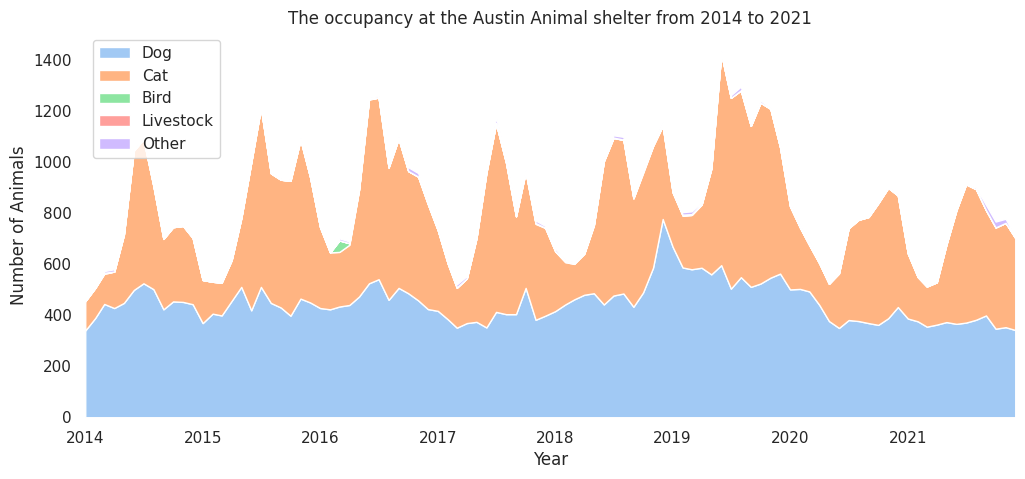

In [106]:
#Plot
fig, ax = plt.subplots(figsize=(12,5))
#ax.grid(axis='y')
ax.grid(False)
ax.stackplot(subset['value'], subset['Dog'], subset['Cat'],subset['Bird'], subset['Livestock'], subset['Other'],
              labels=['Dog', 'Cat', 'Bird', 'Livestock', 'Other'])
ax.legend(loc='upper left')
ax.set_xlim(date(2014,1,1),date(2021,12,1))
ax.set_title('The occupancy at the Austin Animal shelter from 2014 to 2021')
ax.set_ylabel('Number of Animals')
ax.set_xlabel('Year')
ax.spines[:].set_visible(False)

Z grafu je možné pozorovať, že zaplnenosť útulku bola počas obdobia 2014-2019 stabilná. Rástla počas letných mesiacov a klesala ku koncu roka. Taktiež je možné pozorovať, že počet psov sa počas celého obdobia menil menej drasticky ako počet mačiek. 

## 3. Aké sú najčastejšie typy túlavých psov a mačiek
Na zodpovedanie tejto otázky využijeme dataset intakes, z ktorého získam túlavé mačky a psy ("Stray"). 
Zistíme početnosť jednotlivých plemien a farieb, ktoré vizualizujeme pomocou histogramu. Relatívnu početnosť pohlaví vizualizujeme pomocou koláčového grafu.

In [107]:
# Filter out animals from the dataframe
dogs = intakes[(intakes['Animal Type'] == 'Dog') & (intakes['Intake Type'] =='Stray')]['Breed'].value_counts()
cats = intakes[(intakes['Animal Type'] == 'Cat') & (intakes['Intake Type'] =='Stray')]['Breed'].value_counts()
dogs_order = [i for i in dogs.index if dogs[i] > 0]
cats_order = [i for i in cats.index if cats[i] > 0]

def typ_animal(animal):
    """Plot the characteristics of averate stray animal"""
    breed = intakes[(intakes['Animal Type'] == animal) & (intakes['Intake Type'] =='Stray')]['Breed'].value_counts()
    breed_order = [i for i in breed.index if breed[i] > 0]

    fig, ax = plt.subplots(figsize=(15,6))
    fig.suptitle(f'Characteristics of Average Stray {animal} found in Austin TX')

    # Breed
    sns.barplot(data=breed, order=breed_order[:5], ax=ax)
    ax.set_title(f'The most common breeds of stray {animal}')
    ax.set_ylabel('Number of stray animals')
    ax.set_xlabel('Breed')
    ax.bar_label(ax.containers[0])
    ax.grid(False)
    sns.despine(ax=ax)
    
    animal_data = intakes[(intakes['Animal Type'] == animal ) &  (intakes['Intake Type'] =='Stray')]
    animal_color_data = animal_data.value_counts('Color')
    animal_color_order = [i for i in animal_color_data.index if animal_color_data[i] > 0]

    
    fig, ax = plt.subplots(1,2, figsize=(15,5), tight_layout=True)
    sui = animal_data.value_counts('Sex upon Intake', normalize=True)

    # Sex upon Intake
    ax[0].pie(sui, labels=sui.index, autopct='%1.1f%%')
    ax[0].set_title('Sex and Sterility distribution of stray animals') 
        
    # Color
    sns.barplot(data=animal_color_data, order=animal_color_order[:5], ax=ax[1])
    ax[1].set_title(f'The most common colors of stray {animal}')
    ax[1].set_ylabel('Number of Intake Animals')
    ax[1].set_xlabel('Color')
    ax[1].set_xlabel('Breed')
    sns.despine(ax=ax[1])
    ax[1].bar_label(ax[1].containers[0])
    ax[1].grid(False)
    

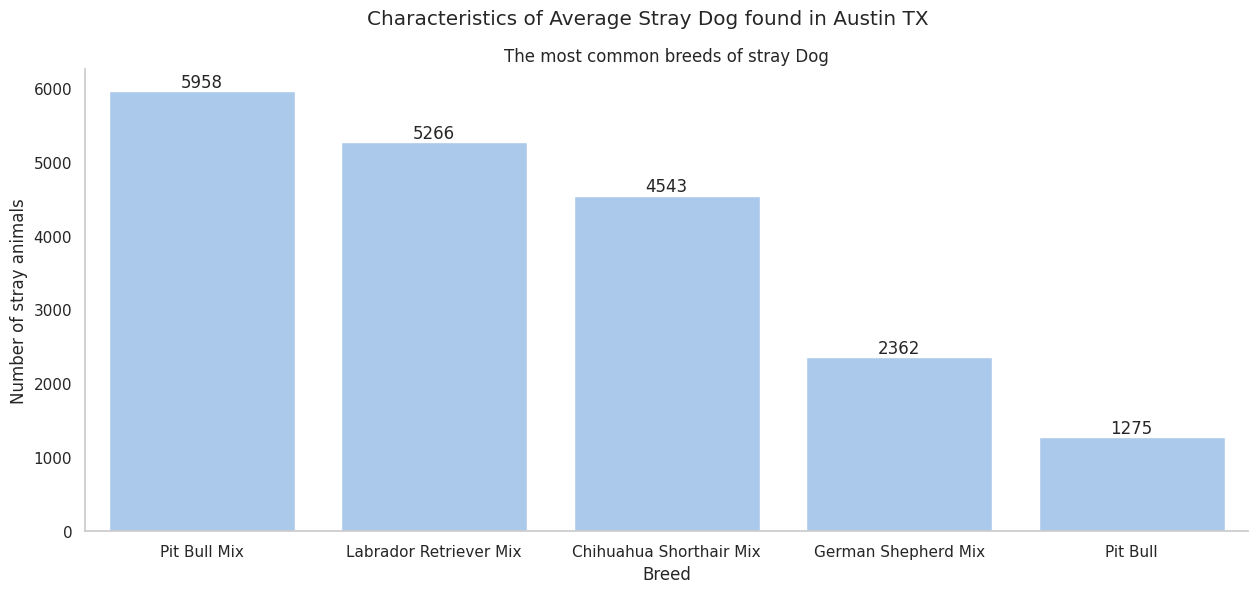

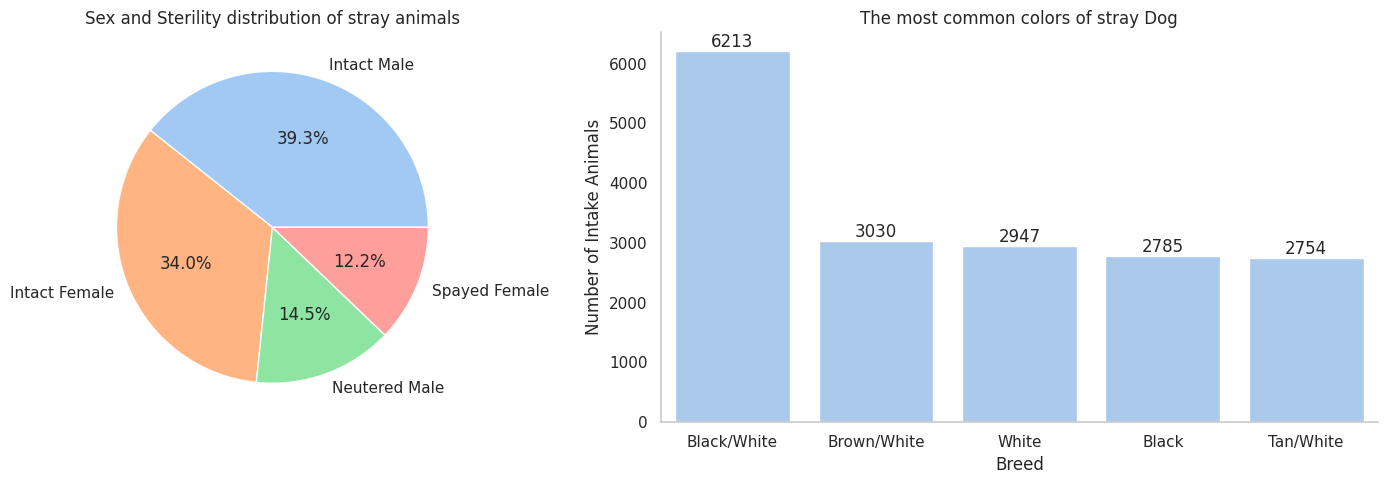

In [108]:
typ_animal('Dog')

V útulku je možné najčastejšie nájsť čierno-bielych a hnedo-bielych pitbullov, labradorov, čivavy a ovčiakov. Počet feniek a psov je takmer rovnaký, no väčšina nie je sterilizovaná. 

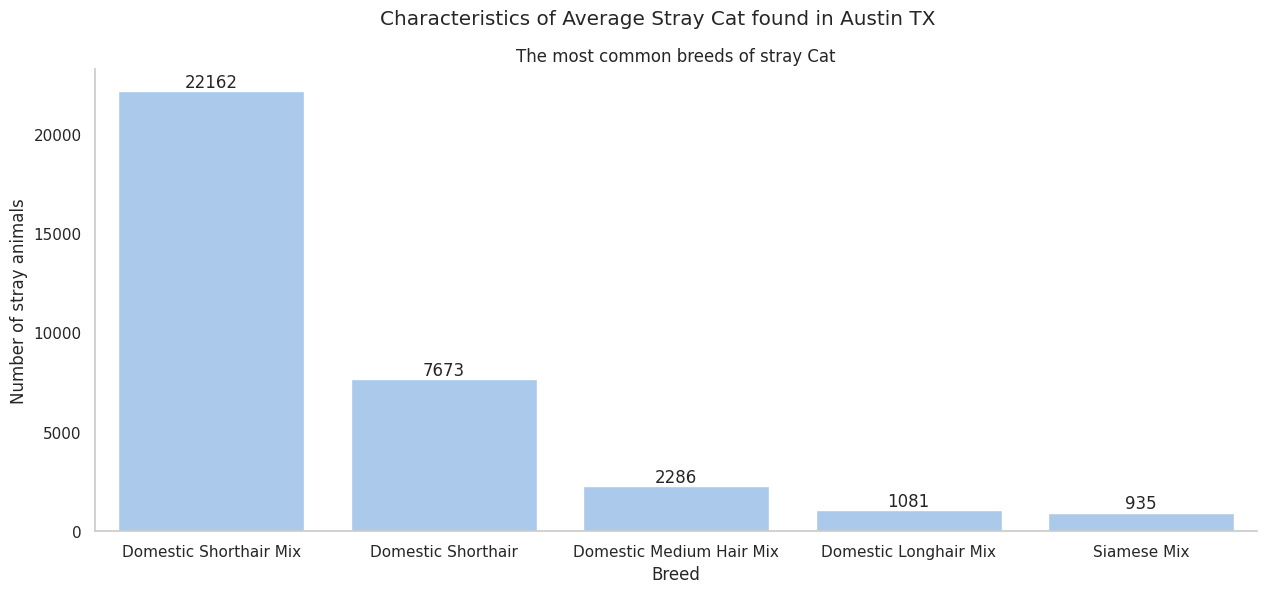

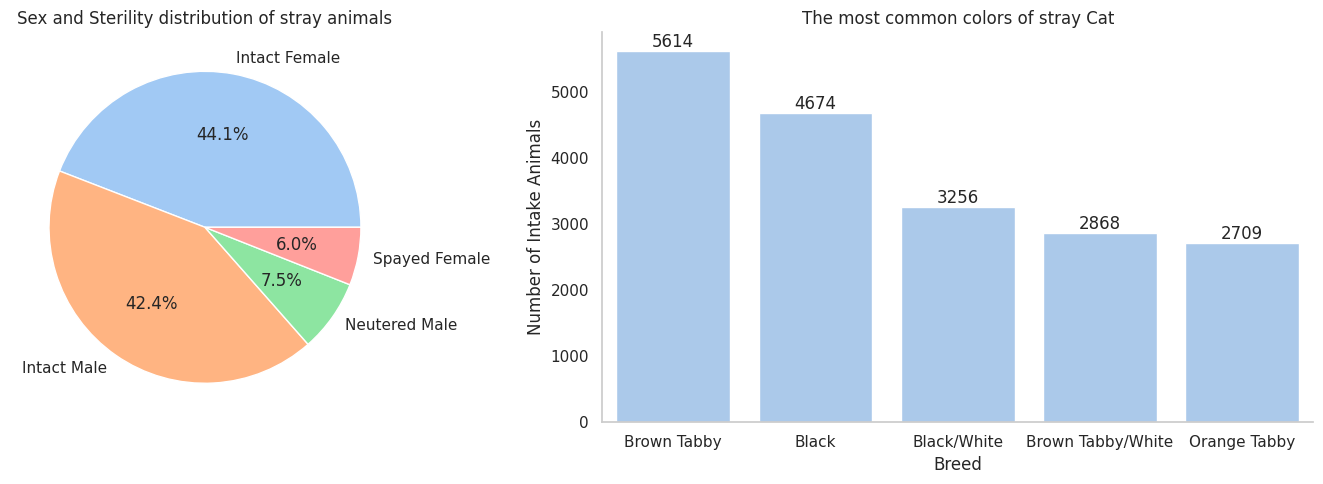

In [109]:
typ_animal('Cat')

V útulku je možné najčastejšie nájsť čierne a hnedé domáce krátkosrsté a dlhosrsté mačky. Počet mačiek a kocúrov je takmer rovnaký, no väčšina nie je sterilizovaná. 